<a href="https://colab.research.google.com/github/hasanmisaii/Nutritional-Sciences-and-Statistics/blob/main/Substitution_INCA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# @title 🔄 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
# @title 📂 Load INCA3 data (replace path with your uploaded file)
df = pd.read_csv("/content/conso-compo-alim-vf-mad-datagouv2021.csv", sep=";", low_memory=False)
print(df.shape)
df.head()

(256301, 109)


,POPULATION,NOIND,NUM_LIGNE,R24_num,R24_nombre,R24_pond,occ_hdeb,occ_type,occ_lieu,occ_alim_libelle,...,magnesium,phosphore,potassium,calcium,manganese,fer,cuivre,zinc,selenium,iode
0,Pop3,110100101,3,1,3,1.0,11:00,4,1,eau,...,0.99,0.0,0.73,7.13,0.00082,0.030,0.017,0.011,0.5,0.0
1,Pop3,110100101,16,1,3,1.0,12:30,5,1,jus d orange,...,9.85,16.2,170.00,0.41,0.02300,0.068,0.025,0.045,1.1,0.7
2,Pop3,110100101,800001,1,3,1.0,12:30,5,1,poulet,...,0.00,0.0,0.00,0.00,0.00000,0.000,0.000,0.000,0.0,0.0
3,Pop3,110100101,6,1,3,1.0,12:30,5,1,frites,...,23.30,106.0,684.00,23.80,0.16000,0.900,0.120,0.360,1.1,2.5
4,Pop3,110100101,14,1,3,1.0,12:30,5,1,poulet,...,23.00,198.0,247.00,11.00,0.01800,1.210,0.084,1.580,12.4,2.5


In [5]:
df['occ_alim_libelle'][df['occ_alim_libelle'] == "soja"]

,occ_alim_libelle
229208,soja


In [7]:
# @title Clean column names for easier access
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")
print(df.columns.tolist())


['population', 'noind', 'num_ligne', 'r24_num', 'r24_nombre', 'r24_pond', 'occ_hdeb', 'occ_type', 'occ_lieu', 'occ_alim_libelle', 'occ_alim_num', 'occ_alim_num_seq', 'gpe_inca3', 'aliment_code_inca3', 'aliment_libelle_inca3', 'aliment_code_fx', 'aliment_libelle_fx', 'qte_conso', 'qte_conso_pond', 'facette_01', 'facette_01_libelle', 'facette_02', 'facette_02_libelle', 'facette_03', 'facette_03_libelle', 'facette_04', 'facette_04_libelle', 'facette_05', 'facette_05_libelle', 'facette_06', 'facette_06_libelle', 'facette_07', 'facette_07_libelle', 'facette_08', 'facette_08_libelle', 'facette_09', 'facette_09_libelle', 'facette_10', 'facette_10_libelle', 'facette_12', 'facette_12_libelle', 'aliment_marque_bio', 'aliment_marque_enrichi', 'facette_13', 'facette_13_libelle', 'facette_14', 'facette_14_libelle', 'facette_19', 'facette_19_libelle', 'facette_20', 'facette_20_libelle', 'facette_25', 'facette_25_libelle', 'facette_27', 'facette_27_libelle', 'aet', 'aesa', 'proteines', 'glucides', 's

In [8]:
# @title Define food groups
def map_group(foodname):
    # Convert to string and handle potential missing values
    name = str(foodname).lower()
    if any(k in name for k in ["boeuf","veau","agneau","mouton", "porc", "foie", "pâté"]):   # , "porc", "foie", "pâté"
        return "red_meat"
    elif any(k in name for k in ["jambon","saucisse","charcuterie"]):
        return "processed_meat"
    elif any(k in name for k in ["lait","fromage","yaourt","crème", "beurre"]):  #BEURRE
        return "dairy"
    elif any(k in name for k in ["lentille","pois","haricot","soja","tofu","noix","amande","cacahuète","pois chiche", "légumineuses"]): # , "légumineuses"
        return "plant_protein"
    else:
        return "other"

# Apply the function after ensuring the column is string type and handling NaNs
df["broad_group"] = df["occ_alim_libelle"].astype(str).fillna("").apply(map_group)
df["broad_group"].value_counts()

,count
broad_group,
other,198325
dairy,40270
plant_protein,7022
red_meat,5720
processed_meat,4964


In [9]:
# @title Compute baseline nutrient intakes

col_map = {
    "noind": "person_id",
    "qte_conso_pond": "grams",
    "proteines": "protein_g_100g",
    "calcium": "calcium_mg_100g",
    "iode": "iodine_mg_100g",
    "vitamine_b12": "vitb12_mg_100g",
    "fibres": "fiber_g_100g",
    "ags": "ags_g_100g",
    "phosphore": "phosphore_mg_100g",
    "magnesium": "magnesium_mg_100g",
    "fer": "iron_mg_100g",
    "vitamine_d": "vitd_ug_100g",
    "aet": "energy_kcal_100g"
}
df = df.rename(columns={k:v for k,v in col_map.items() if k in df.columns})

In [10]:
print(df.columns.tolist())

['population', 'person_id', 'num_ligne', 'r24_num', 'r24_nombre', 'r24_pond', 'occ_hdeb', 'occ_type', 'occ_lieu', 'occ_alim_libelle', 'occ_alim_num', 'occ_alim_num_seq', 'gpe_inca3', 'aliment_code_inca3', 'aliment_libelle_inca3', 'aliment_code_fx', 'aliment_libelle_fx', 'qte_conso', 'grams', 'facette_01', 'facette_01_libelle', 'facette_02', 'facette_02_libelle', 'facette_03', 'facette_03_libelle', 'facette_04', 'facette_04_libelle', 'facette_05', 'facette_05_libelle', 'facette_06', 'facette_06_libelle', 'facette_07', 'facette_07_libelle', 'facette_08', 'facette_08_libelle', 'facette_09', 'facette_09_libelle', 'facette_10', 'facette_10_libelle', 'facette_12', 'facette_12_libelle', 'aliment_marque_bio', 'aliment_marque_enrichi', 'facette_13', 'facette_13_libelle', 'facette_14', 'facette_14_libelle', 'facette_19', 'facette_19_libelle', 'facette_20', 'facette_20_libelle', 'facette_25', 'facette_25_libelle', 'facette_27', 'facette_27_libelle', 'energy_kcal_100g', 'aesa', 'protein_g_100g', '

In [11]:
# @title Compute absolute intakes per record
for nut in ["protein","calcium", "iodine", "vitb12", "fiber", "sfa", "phosphore", "magnesium", "iron","vitd","energy"]:
    # Determine the correct column name based on the nutrient
    if nut == "protein":
        nutrient_col = "protein_g_100g"
    elif nut == "calcium":
        nutrient_col = "calcium_mg_100g"
    elif nut == "iodine":
         nutrient_col = "iodine_mg_100g"
    elif nut == "vitb12":
         nutrient_col = "vitb12_mg_100g"
    elif nut == "fiber":
         nutrient_col = "fiber_g_100g"
    elif nut == "sfa":
         nutrient_col = "ags_g_100g"
    elif nut == "phosphore":
         nutrient_col = "phosphore_mg_100g"
    elif nut == "magnesium":
         nutrient_col = "magnesium_mg_100g"
    elif nut == "iron":
        nutrient_col = "iron_mg_100g"
    elif nut == "vitd":
        nutrient_col = "vitd_ug_100g"
    elif nut == "energy":
        nutrient_col = "energy_kcal_100g"
    else:
        # Should not happen with the current list of nutrients
        continue

    df[f"{nut}_intake"] = df["grams"] * df[nutrient_col] / 100

In [37]:
df.head()

,population,person_id,num_ligne,r24_num,r24_nombre,r24_pond,occ_hdeb,occ_type,occ_lieu,occ_alim_libelle,...,calcium_intake,iron_intake,vitd_intake,energy_intake,iodine_intake,vitb12_intake,fiber_intake,sfa_intake,phosphore_intake,magnesium_intake
0,Pop3,110100101,3,1,3,1.0,11:00,4,1,eau,...,10.51675,0.04425,0.0000,0.00,0.000,0.0000,0.000,0.0000,0.00,1.46025
1,Pop3,110100101,16,1,3,1.0,12:30,5,1,jus d orange,...,2.05000,0.34000,0.0000,225.00,3.500,0.0000,1.400,0.2650,81.00,49.25000
2,Pop3,110100101,800001,1,3,1.0,12:30,5,1,poulet,...,0.00000,0.00000,0.0000,0.00,0.000,0.0000,0.000,0.0000,0.00,0.00000
3,Pop3,110100101,6,1,3,1.0,12:30,5,1,frites,...,25.46600,0.96300,0.0000,285.69,2.675,0.0428,4.173,3.4668,113.42,24.93100
4,Pop3,110100101,14,1,3,1.0,12:30,5,1,poulet,...,17.71000,1.94810,0.4025,376.74,4.025,0.6923,0.000,3.3810,318.78,37.03000


In [12]:
df.tail()

,population,person_id,num_ligne,r24_num,r24_nombre,r24_pond,occ_hdeb,occ_type,occ_lieu,occ_alim_libelle,...,calcium_intake,iodine_intake,vitb12_intake,fiber_intake,sfa_intake,phosphore_intake,magnesium_intake,iron_intake,vitd_intake,energy_intake
256296,Pop3,829207801,624146,3,3,1.071428,20:00,9,1,lentille,...,16.874999,2.410714,0.000000,3.214286,0.112500,66.455355,12.696428,1.341964,0.000000,75.455354
256297,Pop3,829207801,624148,3,3,1.071428,20:00,9,1,oeuf dur,...,21.964285,26.624999,0.594643,0.000000,1.366071,92.142853,7.500000,0.937500,0.600000,71.785711
256298,Pop3,829207801,624152,3,3,1.071428,20:00,9,1,eau gazeuse,...,24.179464,0.000000,0.000000,0.000000,0.000000,0.002371,12.642857,0.000790,0.000000,0.000000
256299,Pop3,829207801,624157,3,3,1.071428,23:00,10,1,céréales,...,24.557141,50.999997,0.381429,1.641428,3.570000,88.285708,30.771427,2.472857,0.107143,196.714273
256300,Pop3,829207801,624155,3,3,1.071428,23:00,10,1,eau,...,13.354017,0.000000,0.000000,0.000000,0.000000,0.001185,1.430223,0.018174,0.000000,0.000000


In [13]:
# @title Compute baseline nutrient intakes (daily average)
# Group by person_id and r24_num to get total intake per person per survey day
person_daily_intake = df.groupby(["person_id", "r24_num"])[["protein_intake","calcium_intake", "iodine_intake", "vitb12_intake", "fiber_intake", "sfa_intake", "phosphore_intake",
                                                            "magnesium_intake" ,"iron_intake","vitd_intake","energy_intake"]].sum().reset_index()

# Calculate the average daily intake per person
baseline = person_daily_intake.groupby("person_id")[["protein_intake","calcium_intake", "iodine_intake", "vitb12_intake", "fiber_intake", "sfa_intake", "phosphore_intake",
                                                            "magnesium_intake" ,"iron_intake","vitd_intake","energy_intake"]].mean().reset_index()

display(baseline.head())

,person_id,protein_intake,calcium_intake,iodine_intake,vitb12_intake,fiber_intake,sfa_intake,phosphore_intake,magnesium_intake,iron_intake,vitd_intake,energy_intake
0,110100101,83.054967,642.884615,108.766571,4.486623,16.439403,23.060402,1190.981891,276.303957,9.020890,2.204268,2077.762487
1,110100701,42.008881,739.254846,129.015456,1.346285,21.721513,15.765451,859.446232,376.293978,6.065968,2.835608,1123.739506
2,110100801,87.255278,873.055826,84.323668,3.337443,20.448514,40.389888,1217.984120,245.472510,8.651539,2.899170,2544.575381
3,110101201,64.621905,461.593429,103.926573,9.281022,14.028072,21.769218,916.207717,413.065580,7.887505,3.907380,2154.636796
4,110101401,44.161503,660.000554,96.764204,1.939099,12.723254,23.027024,790.919930,210.742978,5.105304,2.262959,1229.299356


In [14]:
# @title Substitution structure
def simulate_substitution(data, target_groups, sub_level=0.25):
    d = data.copy()

    # Reduce target foods
    mask = d["broad_group"].isin(target_groups)
    d.loc[mask, "grams_reduced"] = d.loc[mask, "grams"] * sub_level
    d.loc[mask, "grams"] *= (1 - sub_level)

    # Total average grams reduced per person
    reduced_sum = d.groupby(["person_id", "r24_num"])["grams_reduced"].sum().fillna(0)
    reduced = d.groupby(["person_id"])["grams_reduced"].mean().fillna(0)

    # Prepare results container
    new_rows = []

    for pid, add in reduced.items():
        person = d[d["person_id"]==pid].copy()
        if add > 0:
            plants = person[person["broad_group"]=="plant_protein"]

            if plants.empty:
                # Default pool: take mean nutrient profile of all plant foods for numeric columns only
                pool = d[d["broad_group"]=="plant_protein"].select_dtypes(include=np.number).mean().to_frame().T
                # pool = d[d["broad_group"]=="plant_protein"].select_dtypes(include=np.number).mean().reset_index()
                pool = pool.sample(1)  # assign one synthetic plant food
                pool["person_id"] = pid
                pool["grams"] = add
                new_rows.append(pool)
            else:
                weights = plants["grams"]
                if weights.sum()==0:
                    weights = np.ones(len(plants))
                weights = weights / weights.sum()
                person.loc[plants.index, "grams"] += add * weights.values
        new_rows.append(person)

    d2 = pd.concat(new_rows, ignore_index=True)

    # Recompute nutrient intakes
    for nut in ["protein","calcium", "iodine", "vitb12", "fiber", "sfa", "phosphore", "magnesium", "iron","vitd","energy"]:
        # Determine the correct column name based on the nutrient
        if nut == "protein":
            nutrient_col = "protein_g_100g"
        elif nut == "calcium":
            nutrient_col = "calcium_mg_100g"
        elif nut == "iodine":
            nutrient_col = "iodine_mg_100g"
        elif nut == "vitb12":
            nutrient_col = "vitb12_mg_100g"
        elif nut == "fiber":
            nutrient_col = "fiber_g_100g"
        elif nut == "sfa":
            nutrient_col = "ags_g_100g"
        elif nut == "phosphore":
            nutrient_col = "phosphore_mg_100g"
        elif nut == "magnesium":
            nutrient_col = "magnesium_mg_100g"
        elif nut == "iron":
            nutrient_col = "iron_mg_100g"
        elif nut == "vitd":
            nutrient_col = "vitd_ug_100g"
        elif nut == "energy":
            nutrient_col = "energy_kcal_100g"
        else:
            # Should not happen with the current list of nutrients
            continue

        d2[f"{nut}_intake"] = d2["grams"] * d2[nutrient_col] / 100

    # Group by person_id and r24_num to get total intake per person per survey day
    person_daily_intake = d2.groupby(["person_id", "r24_num"])[["protein_intake","calcium_intake", "iodine_intake", "vitb12_intake", "fiber_intake", "sfa_intake", "phosphore_intake",
                                                            "magnesium_intake" ,"iron_intake","vitd_intake","energy_intake"]].sum().reset_index()

    # Calculate the average daily intake per person
    person_average_intake = person_daily_intake.groupby("person_id")[["protein_intake","calcium_intake", "iodine_intake", "vitb12_intake", "fiber_intake", "sfa_intake", "phosphore_intake",
                                                            "magnesium_intake" ,"iron_intake","vitd_intake","energy_intake"]].mean().reset_index()


    return person_average_intake #d2.groupby("person_id")[["protein_intake","calcium_intake","iron_intake","vitd_intake","energy_intake"]].sum().reset_index()

In [15]:
# @title Run scenarios
scenarios = {"baseline": baseline}
scenarios["meat_25"] = simulate_substitution(df, ["red_meat","processed_meat"], 0.25)
scenarios["meat_50"] = simulate_substitution(df, ["red_meat","processed_meat"], 0.50)
scenarios["meat_75"] = simulate_substitution(df, ["red_meat","processed_meat"], 0.75)
scenarios["meat_100"] = simulate_substitution(df, ["red_meat","processed_meat"], 1)
scenarios["dairy_25"] = simulate_substitution(df, ["dairy"], 0.25)
scenarios["dairy_50"] = simulate_substitution(df, ["dairy"], 0.50)
scenarios["dairy_75"] = simulate_substitution(df, ["dairy"], 0.75)
scenarios["dairy_100"] = simulate_substitution(df, ["dairy"], 1)

In [16]:
# @title Population-level summaries
pop_summary = {}
for k,v in scenarios.items():
    pop_summary[k] = v.drop(columns="person_id").mean()
pop_summary = pd.DataFrame(pop_summary).T
pop_summary

,protein_intake,calcium_intake,iodine_intake,vitb12_intake,fiber_intake,sfa_intake,phosphore_intake,magnesium_intake,iron_intake,vitd_intake,energy_intake
baseline,73.847446,898.823256,136.317540,4.702495,17.758818,30.114936,1156.962979,291.731824,9.654947,3.099136,1911.877740
meat_25,65.849965,821.712748,125.663553,4.192205,16.378186,27.133969,1043.878899,266.120132,8.746125,2.815615,1734.107727
meat_50,64.005664,819.084916,126.014777,4.068486,16.392110,26.742159,1026.612235,264.605530,8.634552,2.781274,1716.978852
meat_75,62.161364,816.457085,126.366001,3.944768,16.406034,26.350348,1009.345572,263.090927,8.522978,2.746932,1699.849978
meat_100,60.317063,813.829253,126.717225,3.821049,16.419958,25.958537,992.078909,261.576324,8.411404,2.712591,1682.721104
dairy_25,63.558192,725.824916,115.681466,4.015682,15.793251,25.304782,974.037023,252.233046,8.387720,2.528338,1641.826091
dairy_50,60.811883,646.894768,108.934452,3.803636,15.571224,23.686578,910.116534,242.584006,8.108200,2.282053,1570.804765
dairy_75,58.065575,567.964621,102.187439,3.591591,15.349196,22.068374,846.196045,232.934966,7.828681,2.035768,1499.783439
dairy_100,55.319267,489.034473,95.440426,3.379545,15.127169,20.450170,782.275555,223.285926,7.549161,1.789483,1428.762112


In [17]:
scenarios["meat_25"]

,person_id,protein_intake,calcium_intake,iodine_intake,vitb12_intake,fiber_intake,sfa_intake,phosphore_intake,magnesium_intake,iron_intake,vitd_intake,energy_intake
0,110100101,80.831147,644.468181,106.861187,4.262411,16.590345,23.000977,1176.046551,274.751071,8.853420,2.188725,2069.670417
1,110100701,38.852160,719.216730,126.015104,1.258000,21.096549,15.105837,807.600003,368.660032,5.911326,2.721269,1093.968739
2,110100801,87.255278,873.055826,84.323668,3.337443,20.448514,40.389888,1217.984120,245.472510,8.651539,2.899170,2544.575381
3,110101201,63.152763,463.810571,112.878574,9.324165,14.046432,21.343504,904.864860,412.179866,7.646648,4.037951,2146.008224
4,110101401,43.276228,660.303577,96.718517,1.899872,12.764953,23.045254,784.321524,210.373426,5.091239,2.252959,1230.446695
...,...,...,...,...,...,...,...,...,...,...,...,...
4109,827404801,58.608283,947.054474,142.115842,2.480889,27.409938,26.292972,980.058539,284.147439,8.433755,2.488231,1744.893595
4110,827510001,44.514927,521.418372,65.798049,3.654938,8.955844,23.637065,548.871713,155.017396,7.839484,3.355693,1334.379813
4111,828402601,94.783633,1260.065334,168.682335,5.276618,22.134982,56.678188,1472.925236,294.787265,11.335623,4.312422,2915.152990
4112,828402701,39.922517,535.344019,170.901245,1.299860,23.669193,19.690308,742.098249,242.414271,8.352018,1.429494,1693.268913


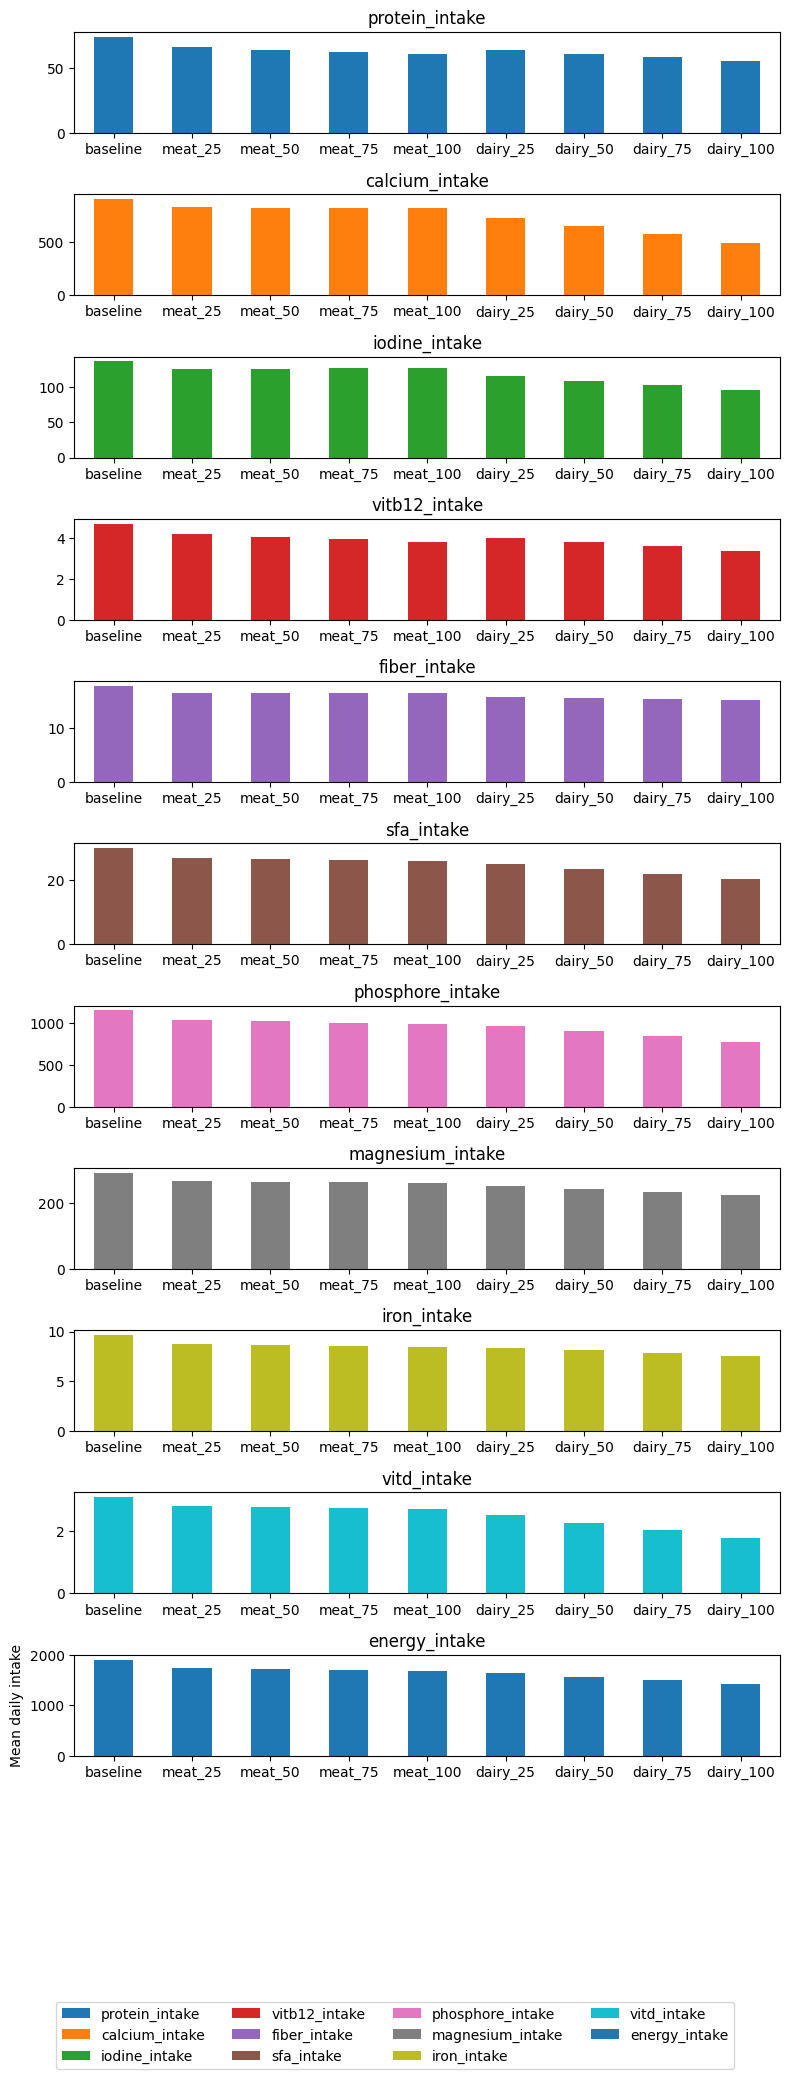

In [24]:
fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(8, 20)) # Further increased figure height
pop_summary[["protein_intake","calcium_intake", "iodine_intake", "vitb12_intake", "fiber_intake", "sfa_intake", "phosphore_intake",
                                                            "magnesium_intake" ,"iron_intake","vitd_intake","energy_intake"]].plot(kind="bar", subplots=True, ax=axes, legend=False) # Pass the axes to the plot function and disable legends on subplots
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 0), ncol=4)
plt.ylabel("Mean daily intake")
# plt.title() # This title might be redundant with subplot titles
# plt.xticks(rotation=50) # Remove this line
for ax in axes: # Iterate through each subplot
    ax.tick_params(axis='x', rotation=0) # Apply rotation to x-axis labels
plt.tight_layout(rect=[0, 0.1, 1, 1]) # Adjust layout to make space for the legend
plt.show()

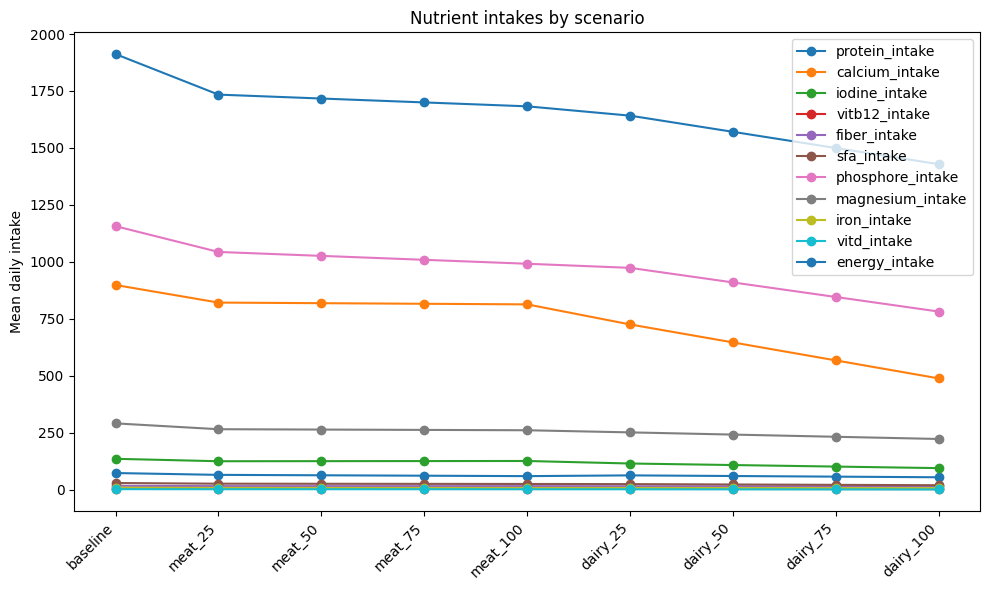

In [25]:
fig, ax = plt.subplots(figsize=(10, 6)) # Create a single subplot for the line plot
x = np.arange(len(pop_summary.index)) # Use pop_summary.index for x-axis positions
y = pop_summary[["protein_intake","calcium_intake", "iodine_intake", "vitb12_intake", "fiber_intake", "sfa_intake", "phosphore_intake",
                                                            "magnesium_intake" ,"iron_intake","vitd_intake","energy_intake"]]
for col in y.columns:
    ax.plot(x, pop_summary[col], marker='o', label=col) # Plot on the created axes
ax.set_xticks(x) # Set x-axis ticks to be at the positions of the data points
ax.set_xticklabels(pop_summary.index, rotation=45, ha='right') # Set x-axis labels
ax.set_ylabel('Mean daily intake') # Changed label from Inadequacy (%) to Mean daily intake based on data
ax.set_title('Nutrient intakes by scenario') # Changed title from Nutrient inadequacy by scenario
ax.legend()
plt.tight_layout() # Adjust layout
plt.show()

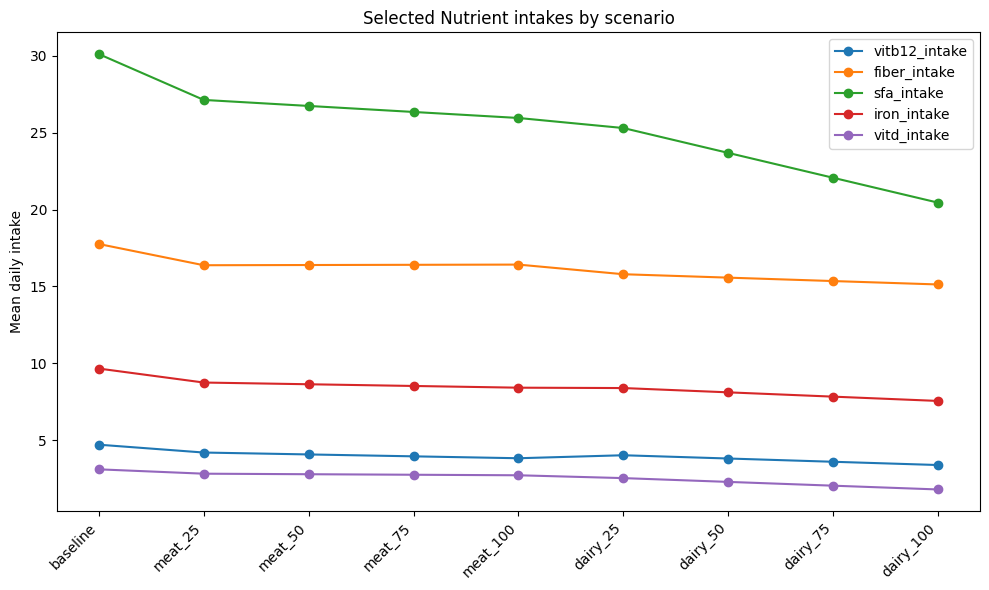

In [27]:
fig, ax = plt.subplots(figsize=(10, 6)) # Create a single subplot for the line plot
x = np.arange(len(pop_summary.index)) # Use pop_summary.index for x-axis positions
y = pop_summary[["vitb12_intake", "fiber_intake", "sfa_intake",
                                                            "iron_intake","vitd_intake"]]
for col in y.columns:
    ax.plot(x, pop_summary[col], marker='o', label=col) # Plot on the created axes
ax.set_xticks(x) # Set x-axis ticks to be at the positions of the data points
ax.set_xticklabels(pop_summary.index, rotation=45, ha='right') # Set x-axis labels
ax.set_ylabel('Mean daily intake') # Changed label from Inadequacy (%) to Mean daily intake based on data
ax.set_title('Selected Nutrient intakes by scenario') # Changed title from Nutrient inadequacy by scenario and added 'Selected'
ax.legend()
plt.tight_layout() # Adjust layout
plt.show()

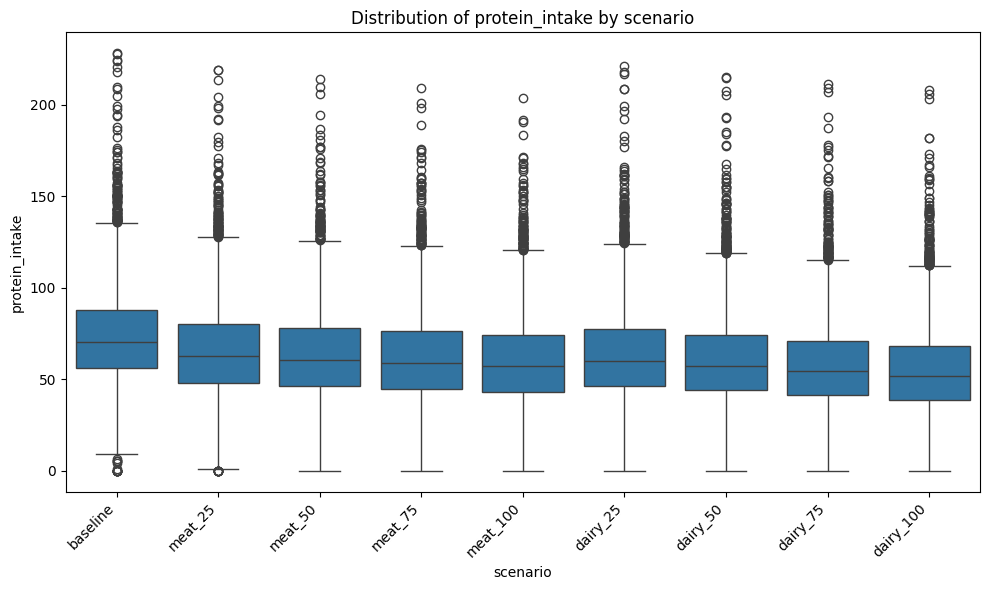

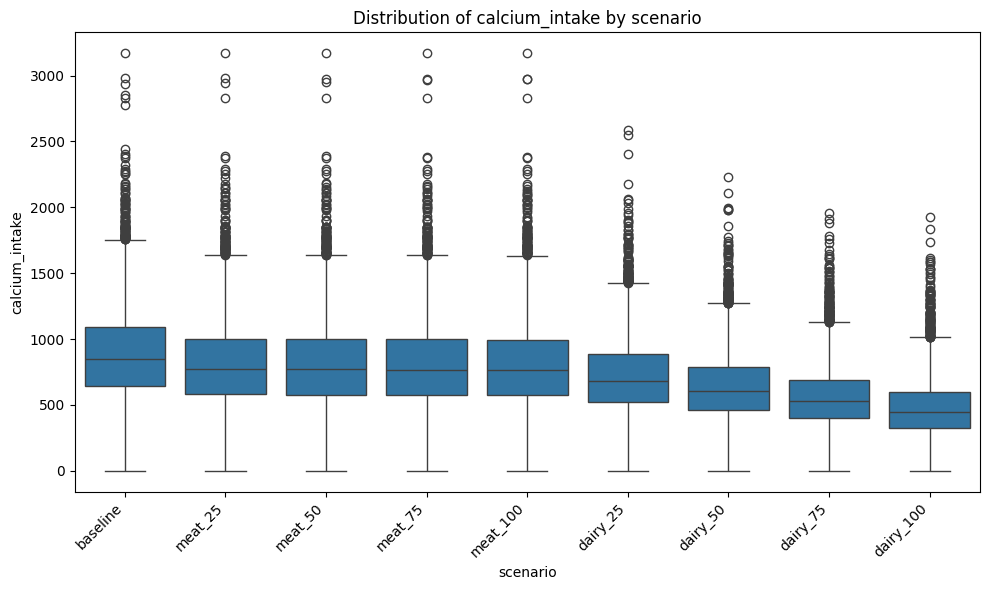

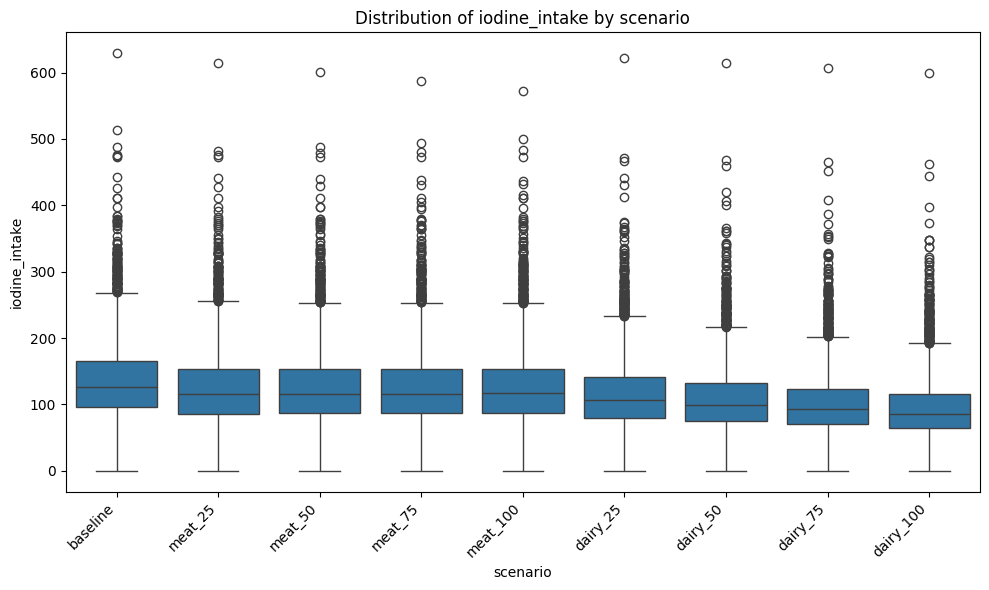

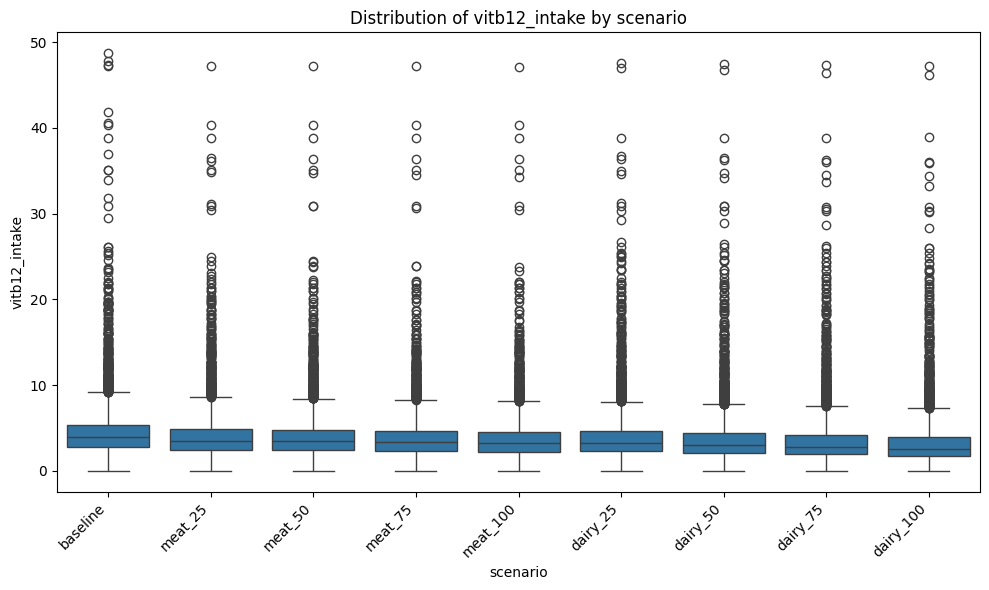

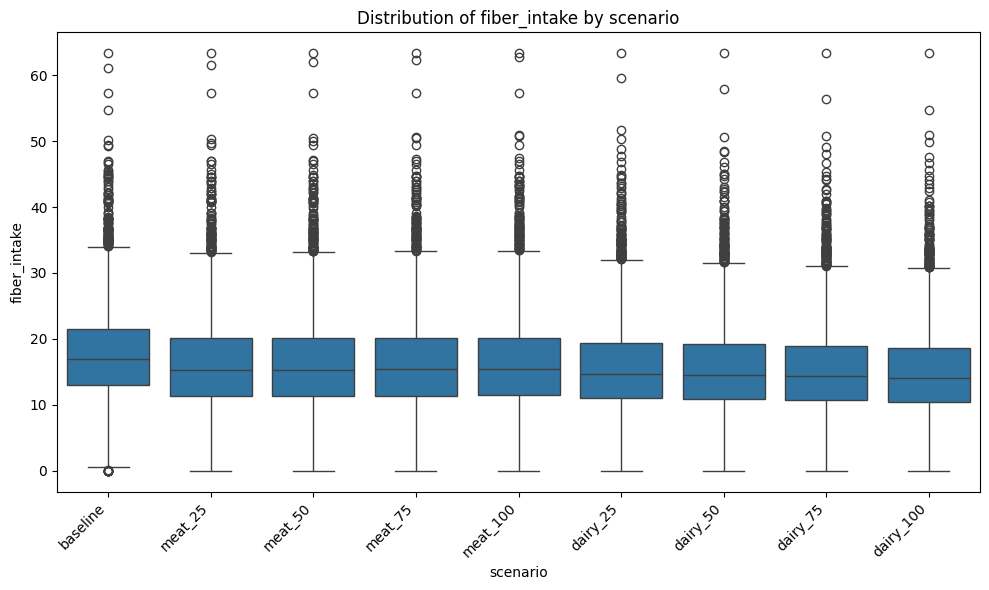

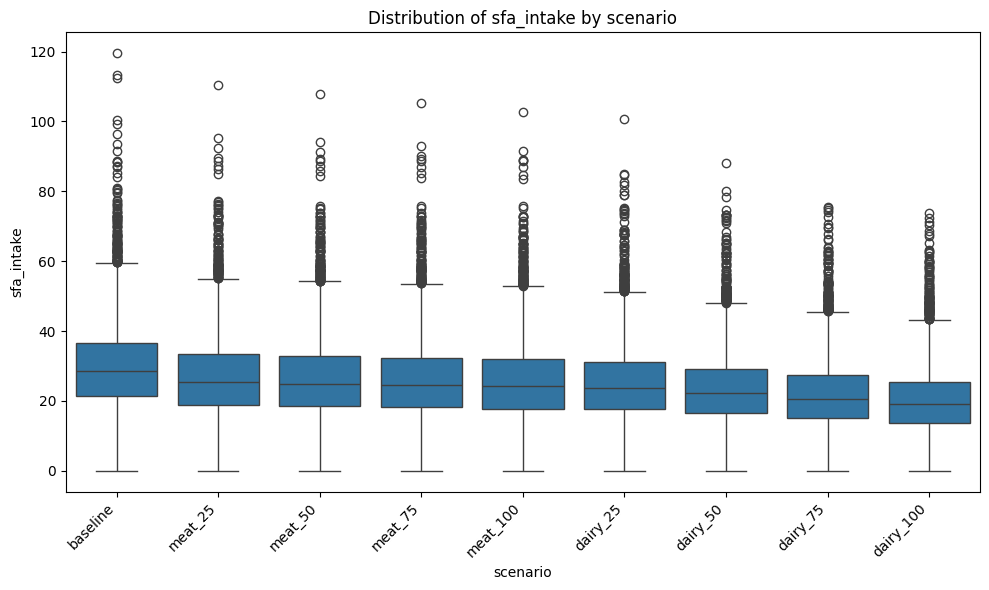

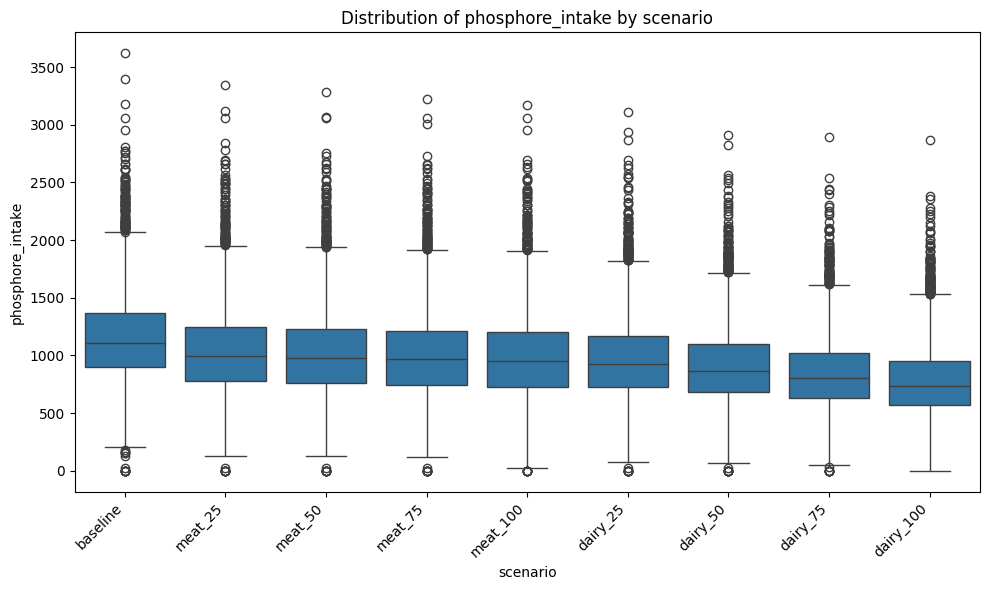

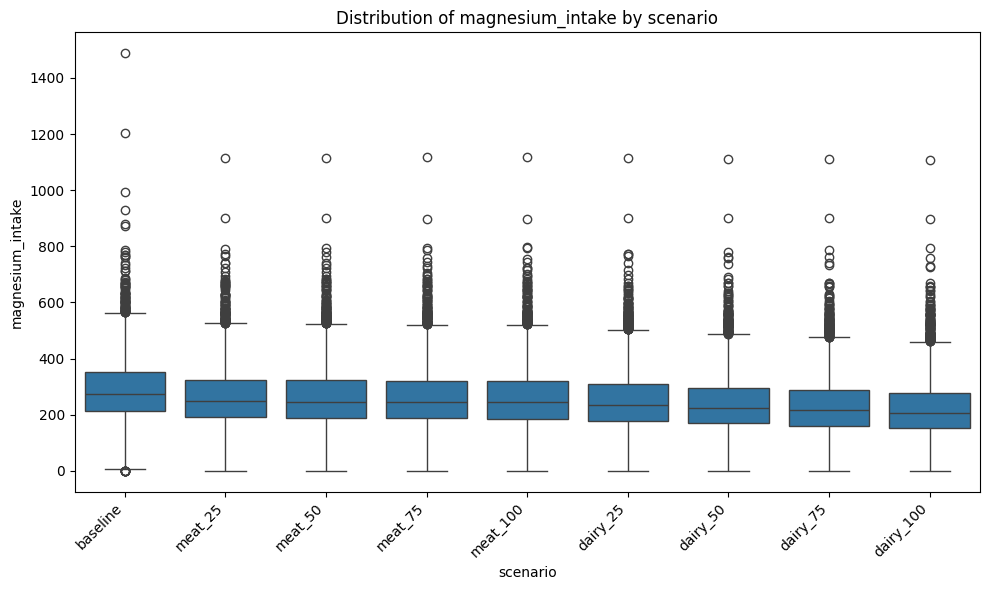

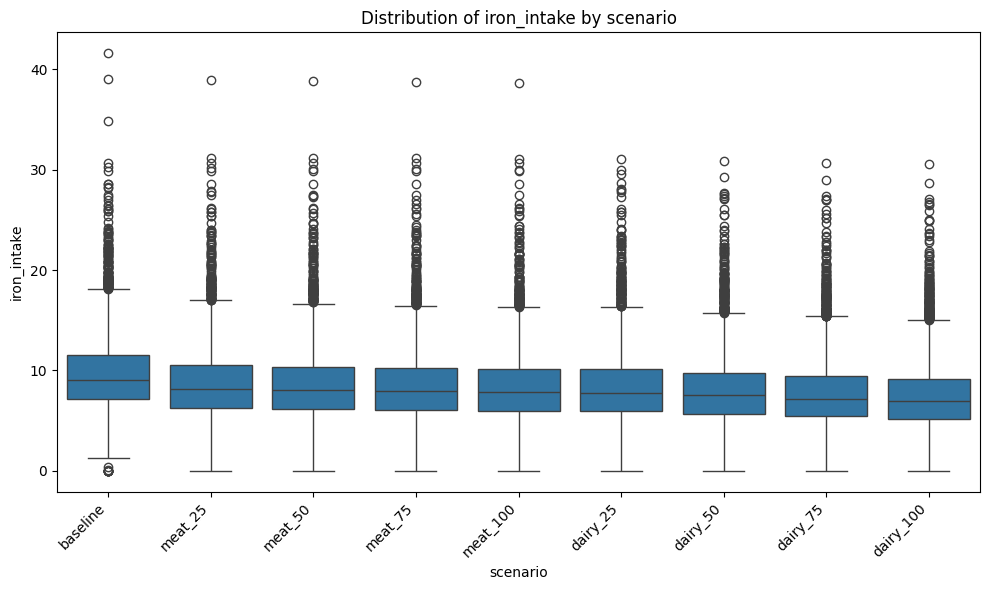

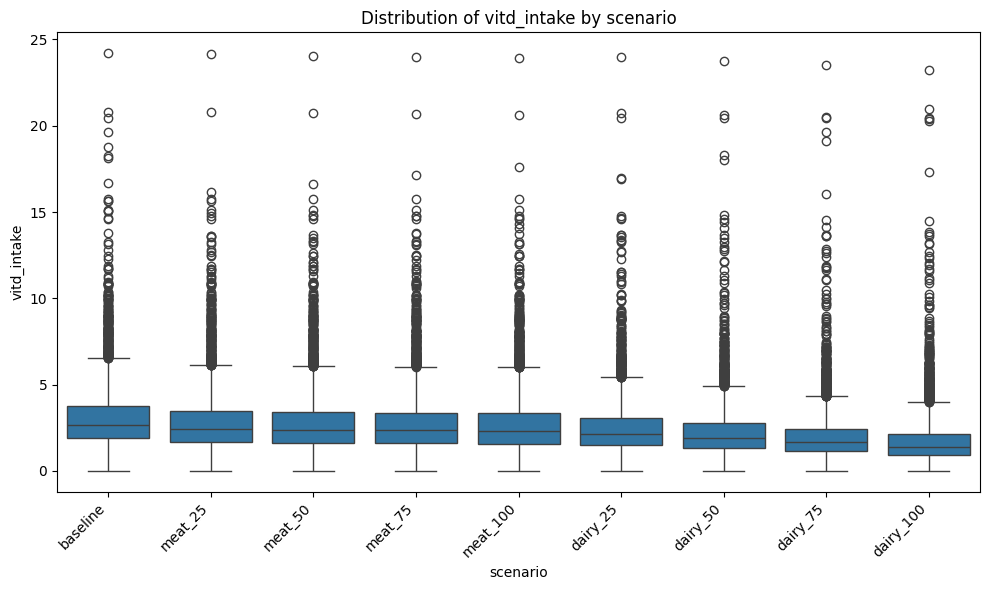

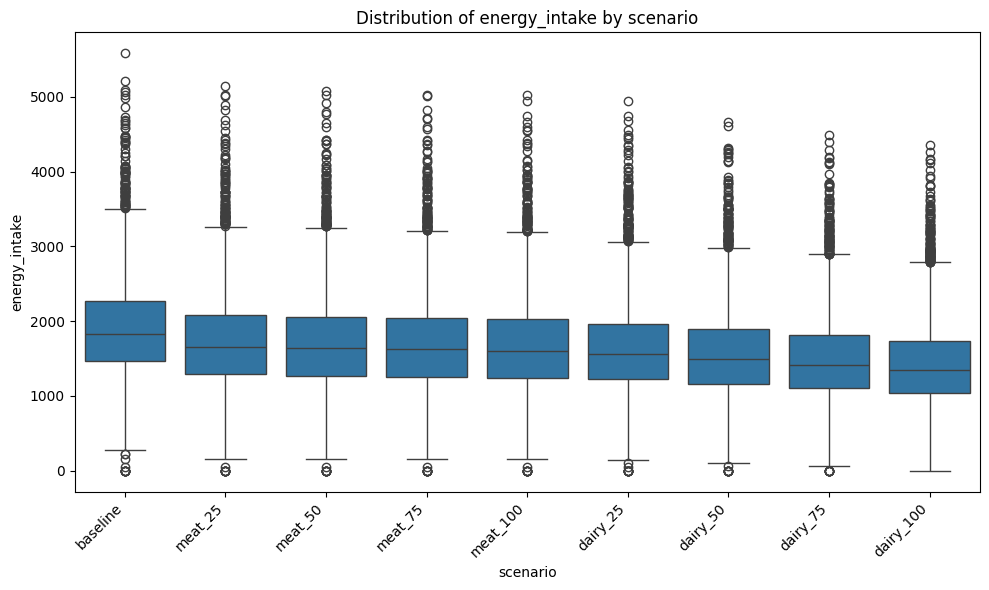

In [28]:
# @title Box plots for nutrient intake
import seaborn as sns

# Prepare data for plotting
# Melt the scenarios dictionary into a long-format DataFrame
plot_data_nutrient = pd.concat([df.assign(scenario=k) for k, df in scenarios.items()], ignore_index=True)

# List of nutrient columns to plot
nutrient_columns = ["protein_intake","calcium_intake", "iodine_intake", "vitb12_intake", "fiber_intake", "sfa_intake", "phosphore_intake",
                    "magnesium_intake" ,"iron_intake","vitd_intake","energy_intake"]

# Create box plots for each nutrient
for nutrient in nutrient_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=plot_data_nutrient, x="scenario", y=nutrient)
    plt.title(f'Distribution of {nutrient} by scenario')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [35]:
# load AGRIBALYSE environmental impacts
agrib = pd.read_csv("/content/Agribalyse_Synthese.csv",  sep=";", low_memory=False)
print(agrib.shape)
agrib.head()

(2451, 32)


,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Approche emballage,...,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Changement climatique - émissions biogéniques,Changement climatique - émissions fossiles,Changement climatique - émissions liées au changement d'affectation des sols
0,11172,11172,aides culinaires et ingrédients divers,aides culinaires,"Court-bouillon pour poissons, déshydraté","Aromatic stock cube, for fish, dehydrated",2,0,Ambiant (long),PACK PROXY,...,0.02680,0.1370,70.2,106.0,3.380,700.0,0.0000514,0.1040,7.460,0.02120
1,25525,25525,aides culinaires et ingrédients divers,aides culinaires,"Pizza, sauce garniture pour",Topping sauce for pizza,2,0,Ambiant (long),PACK PROXY,...,0.00416,0.0303,11.0,67.7,2.470,24.4,0.00000591,0.0336,1.020,-0.10800
2,11214,11214,aides culinaires et ingrédients divers,aides culinaires,"Préparation culinaire à base de soja, type ""cr...","Soy ""cream"" preparation",2,0,Ambiant (long),PACK PROXY,...,0.00723,0.0244,30.8,116.0,0.422,22.4,0.00000396,0.0252,0.965,0.18400
3,11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,0,Ambiant (long),PACK PROXY,...,0.01500,0.1440,57.9,26.7,4.830,396.0,0.0000794,0.0401,11.700,0.00655
4,20995,20995,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),PACK PROXY,...,0.01500,0.1440,57.9,26.7,4.830,396.0,0.0000794,0.0401,11.700,0.00655


In [36]:
# @title Clean column names for easier access
agrib.columns = agrib.columns.str.lower().str.strip().str.replace(" ", "_")
print(agrib.columns.tolist())

['code_agb', 'code_ciqual', "groupe_d'aliment", "sous-groupe_d'aliment", 'nom_du_produit_en_français', 'lci_name', 'code_saison', 'code_avion', 'livraison', 'approche_emballage', 'préparation', 'dqr', 'score_unique_ef', 'changement_climatique', "appauvrissement_de_la_couche_d'ozone", 'rayonnements_ionisants', "formation_photochimique_d'ozone", 'particules_fines', 'effets_toxicologiques_sur_la_santé_humaine\xa0:_substances_non-cancérogènes', 'effets_toxicologiques_sur_la_santé_humaine\xa0:_substances_cancérogènes', 'acidification_terrestre_et_eaux_douces', 'eutrophisation_eaux_douces', 'eutrophisation_marine', 'eutrophisation_terrestre', "écotoxicité_pour_écosystèmes_aquatiques_d'eau_douce", 'utilisation_du_sol', 'épuisement_des_ressources_eau', 'épuisement_des_ressources_énergétiques', 'épuisement_des_ressources_minéraux', 'changement_climatique_-_émissions_biogéniques', 'changement_climatique_-_émissions_fossiles', "changement_climatique_-_émissions_liées_au_changement_d'affectation_d

In [37]:
agrib["changement_climatique"]

,changement_climatique
0,7.58
1,0.94
2,1.17
3,11.80
4,11.80
...,...
2446,29.70
2447,29.40
2448,29.40
2449,36.80


In [38]:
agrib['code_ciqual']

,code_ciqual
0,11172
1,25525
2,11214
3,11084
4,20995
...,...
2446,6581
2447,6523
2448,6524
2449,6551


In [39]:
# @title Prepare AGRIBALYSE environmental factors

# Keep relevant impact categories
agrib = agrib[[
    "code_ciqual",
     "nom_du_produit_en_français",
    "changement_climatique",
    "utilisation_du_sol",
    "épuisement_des_ressources_eau"
]].rename(columns={
    "code_ciqual": "aliment_code_inca3",
    "nom_du_produit_en_français": "aliment_name",
    "changement_climatique": "ghge_kgco2_per_kg",
    "utilisation_du_sol": "land_m2y_per_kg",
    "épuisement_des_ressources_eau": "water_m3_per_kg"
})

# Convert from per kg → per gram
agrib["ghge_kgco2_per_g"] = agrib["ghge_kgco2_per_kg"] / 1000
agrib["land_m2y_per_g"] = agrib["land_m2y_per_kg"] / 1000
agrib["water_m3_per_g"] = agrib["water_m3_per_kg"] / 1000



agrib.head()

,aliment_code_inca3,aliment_name,ghge_kgco2_per_kg,land_m2y_per_kg,water_m3_per_kg,ghge_kgco2_per_g,land_m2y_per_g,water_m3_per_g
0,11172,"Court-bouillon pour poissons, déshydraté",7.58,106.0,3.380,0.00758,0.1060,0.003380
1,25525,"Pizza, sauce garniture pour",0.94,67.7,2.470,0.00094,0.0677,0.002470
2,11214,"Préparation culinaire à base de soja, type ""cr...",1.17,116.0,0.422,0.00117,0.1160,0.000422
3,11084,"Agar (algue), cru",11.80,26.7,4.830,0.01180,0.0267,0.004830
4,20995,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée",11.80,26.7,4.830,0.01180,0.0267,0.004830


In [47]:
df["aliment_code_inca3"]

,aliment_code_inca3
0,1504
1,3246
2,4237
3,4127
4,850
...,...
256296,3322
256297,4232
256298,1503
256299,601


In [48]:
common_codes = set(df['aliment_code_inca3']).intersection(set(agrib['aliment_code_inca3']))
print(f"Number of common aliment_code_inca3 values: {len(common_codes)}")

print(common_codes)

Number of common aliment_code_inca3 values: 101
{1, 3, 4, 1029, 6, 4101, 4102, 4103, 1030, 1031, 9230, 9231, 9232, 5201, 5207, 9330, 9331, 9345, 9380, 9390, 9510, 9001, 9003, 9520, 9010, 9530, 9532, 9533, 2371, 9540, 9545, 9550, 9555, 6001, 6002, 9080, 9085, 9086, 5000, 5001, 5002, 5004, 5005, 5006, 9103, 9104, 5007, 5008, 5011, 9111, 5020, 5021, 5022, 9119, 9121, 4002, 4003, 4004, 5030, 4008, 4015, 4016, 4017, 4018, 4019, 4021, 3000, 4027, 4028, 4029, 4030, 4032, 4035, 2500, 4036, 4037, 4038, 4039, 4041, 4042, 4043, 4044, 4045, 4046, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 5100, 1008, 1012, 1013, 1014, 1015, 1017, 1018, 1019, 1023}


In [49]:
# Merge datasets
df_merge = df.merge(agrib, on="aliment_code_inca3", how="left")
df_merge.head()

,population,person_id,num_ligne,r24_num,r24_nombre,r24_pond,occ_hdeb,occ_type,occ_lieu,occ_alim_libelle,...,iron_intake,vitd_intake,energy_intake,aliment_name,ghge_kgco2_per_kg,land_m2y_per_kg,water_m3_per_kg,ghge_kgco2_per_g,land_m2y_per_g,water_m3_per_g
0,Pop3,110100101,3,1,3,1.0,11:00,4,1,eau,...,0.04425,0.0000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pop3,110100101,16,1,3,1.0,12:30,5,1,jus d orange,...,0.34000,0.0000,225.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pop3,110100101,800001,1,3,1.0,12:30,5,1,poulet,...,0.00000,0.0000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pop3,110100101,6,1,3,1.0,12:30,5,1,frites,...,0.96300,0.0000,285.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pop3,110100101,14,1,3,1.0,12:30,5,1,poulet,...,1.94810,0.4025,376.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
# Remove rows with NaN GHGE values
df_merge.dropna(subset=["ghge_kgco2_per_g", "land_m2y_per_g",	"water_m3_per_g"], inplace=True)
print(df_merge.shape)
df_merge.head()

(4400, 131)


,population,person_id,num_ligne,r24_num,r24_nombre,r24_pond,occ_hdeb,occ_type,occ_lieu,occ_alim_libelle,...,aliment_name,ghge_kgco2_per_kg,land_m2y_per_kg,water_m3_per_kg,ghge_kgco2_per_g,land_m2y_per_g,water_m3_per_g,ghge_intake,land_intake,water_intake
63,Pop3,110100701,134,1,3,1.071428,06:30,2,1,thé,...,Smoothie,0.738,18.8,0.729,0.000738,0.0188,0.000729,0.461250,11.749999,0.455625
83,Pop3,110100701,177,2,3,0.857143,08:30,2,1,thé,...,Smoothie,0.738,18.8,0.729,0.000738,0.0188,0.000729,0.369000,9.400001,0.364500
146,Pop3,110100801,317,2,3,0.857143,12:30,5,2,gratin de cardont,...,"Mil, cuit, non salé",0.310,37.1,0.462,0.000310,0.0371,0.000462,0.072009,8.617801,0.107316
202,Pop3,110101201,438,1,3,0.857143,20:30,9,5,pomme de terre dauphine,...,Coulis de framboise,3.060,144.0,4.170,0.003060,0.1440,0.004170,0.078686,3.702857,0.107229
244,Pop3,110101201,518,3,3,1.071428,12:30,5,5,thon cru,...,"Pomme de terre noisette, surgelée, cuite",4.940,211.0,0.791,0.004940,0.2110,0.000791,0.608679,25.998213,0.097462


In [51]:
# Compute baseline environmental impacts per row/record
df_merge["ghge_intake"]  = df_merge["grams"] * df_merge["ghge_kgco2_per_g"]
df_merge["land_intake"]  = df_merge["grams"] * df_merge["land_m2y_per_g"]
df_merge["water_intake"] = df_merge["grams"] * df_merge["water_m3_per_g"]

In [52]:
display(df_merge["ghge_intake"].describe())

,ghge_intake
count,4400.000000
mean,0.166831
std,0.454785
min,0.000358
25%,0.046020
50%,0.099732
75%,0.194091
max,15.575809


In [53]:
display(df_merge["land_intake"].describe())

,land_intake
count,4400.000000
mean,6.877213
std,29.708744
min,0.021214
25%,0.816193
50%,1.872857
75%,5.019643
max,1018.625555


In [54]:
display(df_merge["water_intake"].describe())

,water_intake
count,4400.000000
mean,0.135115
std,0.250416
min,0.000150
25%,0.022592
50%,0.063300
75%,0.157303
max,4.954286


In [123]:
# @title Baseline GHGE per person (daily average)
# Group by person_id and r24_num to get total intake per person per survey day
person_daily_environment_effects = df_merge.groupby(["person_id", "r24_num"])[["ghge_intake", "land_intake", "water_intake", "protein_intake","calcium_intake", "iodine_intake", "vitb12_intake", "fiber_intake", "sfa_intake", "phosphore_intake",
                                                            "magnesium_intake" ,"iron_intake","vitd_intake","energy_intake"]].sum().reset_index()

# Calculate the average daily GHGE per person
baseline_environment_effects = person_daily_environment_effects.groupby("person_id")[["ghge_intake", "land_intake", "water_intake", "protein_intake","calcium_intake", "iodine_intake", "vitb12_intake", "fiber_intake", "sfa_intake", "phosphore_intake",
                                                            "magnesium_intake" ,"iron_intake","vitd_intake","energy_intake"]].mean().reset_index()
baseline_environment_effects.rename(columns={"ghge_intake": "average_daily_ghge_kgco2", "land_intake": "average_daily_land_m2y", "water_intake": "average_daily_water_m3"}, inplace=True)

print(baseline_environment_effects.head())
print("Population mean average daily GHGE (kg CO2 eq):", baseline_environment_effects["average_daily_ghge_kgco2"].mean())
print("Population mean average daily land (m2):", baseline_environment_effects["average_daily_land_m2y"].mean())
print("Population mean average daily water (m3):", baseline_environment_effects["average_daily_water_m3"].mean())

   person_id  average_daily_ghge_kgco2  average_daily_land_m2y  \
0  110100701                  0.415125               10.575000   
1  110100801                  0.072009                8.617801   
2  110101201                  0.362341               15.368839   
3  110300301                  0.133951                1.622432   
4  110300501                  0.053909                0.652954   

   average_daily_water_m3  protein_intake  calcium_intake  iodine_intake  \
0                0.410062        0.562500        1.125000       3.431250   
1                0.107316        8.269372      193.029450       9.361115   
2                0.109240       15.125892       23.008929      16.368749   
3                0.147399        3.161036       11.351786      17.464286   
4                0.059321        1.757143       14.760001       3.514286   

   vitb12_intake  fiber_intake  sfa_intake  phosphore_intake  \
0       0.000000      0.000000    0.011250          5.625000   
1       0.278743  

In [124]:
def simulate_substitution(data, target_groups, sub_level=0.25):
    d = data.copy()

    # Reduce target foods
    mask = d["broad_group"].isin(target_groups)
    d.loc[mask, "grams_reduced"] = d.loc[mask, "grams"] * sub_level
    d.loc[mask, "grams"] *= (1 - sub_level)

    # Total average grams reduced per person
    reduced_sum = d.groupby(["person_id", "r24_num"])["grams_reduced"].sum().fillna(0)
    reduced = d.groupby(["person_id"])["grams_reduced"].mean().fillna(0)

    # Prepare results container
    new_rows = []

    for pid, add in reduced.items():
        person = d[d["person_id"]==pid].copy()
        if add > 0:
            plants = person[person["broad_group"]=="plant_protein"]

            if plants.empty:
                # Default pool: take mean nutrient profile of all plant foods for numeric columns only
                pool = d[d["broad_group"]=="plant_protein"].select_dtypes(include=np.number).mean().to_frame().T
                # pool = d[d["broad_group"]=="plant_protein"].select_dtypes(include=np.number).mean().reset_index()
                pool = pool.sample(1)  # assign one synthetic plant food
                pool["person_id"] = pid
                pool["grams"] = add
                new_rows.append(pool)
            else:
                weights = plants["grams"]
                if weights.sum()==0:
                    weights = np.ones(len(plants))
                weights = weights / weights.sum()
                person.loc[plants.index, "grams"] += add * weights.values
        new_rows.append(person)

    d2 = pd.concat(new_rows, ignore_index=True)

        # --- 4. Recompute GHGE, Land, Water ---
    d2["ghge_intake"]  = d2["grams"] * d2["ghge_kgco2_per_g"]
    d2["land_intake"]  = d2["grams"] * d2["land_m2y_per_g"]
    d2["water_intake"] = d2["grams"] * d2["water_m3_per_g"]

    # Recompute nutrient intakes
    for nut in ["protein","calcium", "iodine", "vitb12", "fiber", "sfa", "phosphore", "magnesium", "iron","vitd","energy"]:
        # Determine the correct column name based on the nutrient
        if nut == "protein":
            nutrient_col = "protein_g_100g"
        elif nut == "calcium":
            nutrient_col = "calcium_mg_100g"
        elif nut == "iodine":
            nutrient_col = "iodine_mg_100g"
        elif nut == "vitb12":
            nutrient_col = "vitb12_mg_100g"
        elif nut == "fiber":
            nutrient_col = "fiber_g_100g"
        elif nut == "sfa":
            nutrient_col = "ags_g_100g"
        elif nut == "phosphore":
            nutrient_col = "phosphore_mg_100g"
        elif nut == "magnesium":
            nutrient_col = "magnesium_mg_100g"
        elif nut == "iron":
            nutrient_col = "iron_mg_100g"
        elif nut == "vitd":
            nutrient_col = "vitd_ug_100g"
        elif nut == "energy":
            nutrient_col = "energy_kcal_100g"
        else:
            # Should not happen with the current list of nutrients
            continue

        d2[f"{nut}_intake"] = d2["grams"] * d2[nutrient_col] / 100

    # Calculate average daily GHGE per person for the scenario
    person_daily_scenario = d2.groupby(["person_id", "r24_num"])[["ghge_intake", "land_intake", "water_intake", "protein_intake","calcium_intake", "iodine_intake",
                                                                  "vitb12_intake", "fiber_intake", "sfa_intake", "phosphore_intake",
                                                            "magnesium_intake" ,"iron_intake","vitd_intake","energy_intake"]].sum().reset_index()
    average_daily_scenario = person_daily_scenario.groupby("person_id")[["ghge_intake", "land_intake", "water_intake", "protein_intake","calcium_intake", "iodine_intake",
                                                                         "vitb12_intake", "fiber_intake", "sfa_intake", "phosphore_intake",
                                                            "magnesium_intake" ,"iron_intake","vitd_intake","energy_intake"]].mean().reset_index()
    average_daily_scenario.rename(columns={"ghge_intake": "average_daily_ghge_kgco2", "land_intake": "average_daily_land_m2y", "water_intake": "average_daily_water_m3"}, inplace=True)


    return average_daily_scenario

In [125]:
scenarios = {"baseline": baseline_environment_effects}
scenarios["meat_25"] = simulate_substitution(df_merge, ["red_meat","processed_meat"], 0.25)
scenarios["meat_50"] = simulate_substitution(df_merge, ["red_meat","processed_meat"], 0.50)
scenarios["meat_75"] = simulate_substitution(df_merge, ["red_meat","processed_meat"], 0.75)
scenarios["meat_100"] = simulate_substitution(df_merge, ["red_meat","processed_meat"], 1)
scenarios["dairy_25"] = simulate_substitution(df_merge, ["dairy"], 0.25)
scenarios["dairy_50"] = simulate_substitution(df_merge, ["dairy"], 0.50)
scenarios["dairy_75"] = simulate_substitution(df_merge, ["dairy"], 0.75)
scenarios["dairy_100"] = simulate_substitution(df_merge, ["dairy"], 1)

In [126]:
scenarios["meat_25"]

,person_id,average_daily_ghge_kgco2,average_daily_land_m2y,average_daily_water_m3,protein_intake,calcium_intake,iodine_intake,vitb12_intake,fiber_intake,sfa_intake,phosphore_intake,magnesium_intake,iron_intake,vitd_intake,energy_intake
0,110100701,0.415125,10.575000,0.410062,0.562500,1.125000,3.431250,0.000000,0.000000,0.011250,5.625000,11.250000,0.084375,0.000000,2.587500
1,110100801,0.072009,8.617801,0.107316,8.269372,193.029450,9.361115,0.278743,4.970915,9.384344,152.147160,38.559433,1.184657,0.195120,236.931455
2,110101201,0.362341,15.368839,0.109240,15.125892,23.008929,16.368749,5.859696,0.570536,1.225125,190.714279,35.255356,0.827679,3.511607,140.924997
3,110300301,0.133951,1.622432,0.147399,3.161036,11.351786,17.464286,0.129236,3.318214,0.111771,69.857142,29.689285,0.541393,0.000000,132.903213
4,110300501,0.053909,0.652954,0.059321,1.757143,14.760001,3.514286,0.000000,1.546286,1.532229,39.500575,15.462859,0.499029,0.000000,98.400009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,826202901,0.229114,2.775056,0.252115,5.376857,17.415043,7.467857,0.000000,5.376857,0.280791,111.121716,51.677572,0.896143,0.000000,237.179146
2385,826804401,0.192510,2.145112,0.029702,42.352205,20.901088,141.540703,4.510235,0.000000,4.730246,445.523198,52.252721,0.660034,4.895255,375.852904
2386,827301801,0.011250,0.125357,0.001736,2.475000,1.221428,8.271428,0.263571,0.000000,0.276429,26.035713,3.053571,0.038571,0.286071,21.964284
2387,827404801,0.024754,1.032000,0.012069,9.188572,2.334857,5.485715,0.867429,0.000000,0.029486,53.142861,8.228572,0.260571,1.741714,38.057146


In [127]:
# @title Population-level summaries
pop_summary = {}
for k,v in scenarios.items():
    pop_summary[k] = v.drop(columns="person_id").mean()
pop_summary = pd.DataFrame(pop_summary).T
pop_summary

,average_daily_ghge_kgco2,average_daily_land_m2y,average_daily_water_m3,protein_intake,calcium_intake,iodine_intake,vitb12_intake,fiber_intake,sfa_intake,phosphore_intake,magnesium_intake,iron_intake,vitd_intake,energy_intake
baseline,0.214277,8.936624,0.172053,10.027685,37.723798,26.089491,1.383259,1.899864,2.026408,131.889121,28.451790,0.713086,1.115118,170.846247
meat_25,0.209912,8.750992,0.169035,9.964639,37.187746,25.945477,1.380988,1.849040,1.999709,130.576277,27.993095,0.699949,1.114238,168.125523
meat_50,0.210034,8.755973,0.168859,10.023353,37.235339,26.091080,1.389924,1.844244,2.000771,131.141317,28.079166,0.700424,1.122476,168.322905
meat_75,0.210155,8.760955,0.168684,10.082068,37.282933,26.236683,1.398861,1.839448,2.001833,131.706358,28.165236,0.700898,1.130714,168.520287
meat_100,0.210276,8.765937,0.168508,10.140782,37.330527,26.382285,1.407797,1.834652,2.002895,132.271399,28.251307,0.701373,1.138952,168.717669
dairy_25,0.207511,8.703574,0.166936,9.889524,36.225146,25.562628,1.360926,1.844926,1.925941,129.363802,27.797842,0.697092,1.100765,166.404899
dairy_50,0.207482,8.705965,0.166607,9.986868,36.148751,25.748173,1.371883,1.844776,1.919336,130.304480,27.977258,0.699966,1.111338,166.894717
dairy_75,0.207452,8.708356,0.166278,10.084213,36.072355,25.933719,1.382840,1.844627,1.912731,131.245158,28.156673,0.702840,1.121912,167.384534
dairy_100,0.207423,8.710747,0.165949,10.181557,35.995960,26.119264,1.393797,1.844478,1.906126,132.185836,28.336089,0.705714,1.132486,167.874351


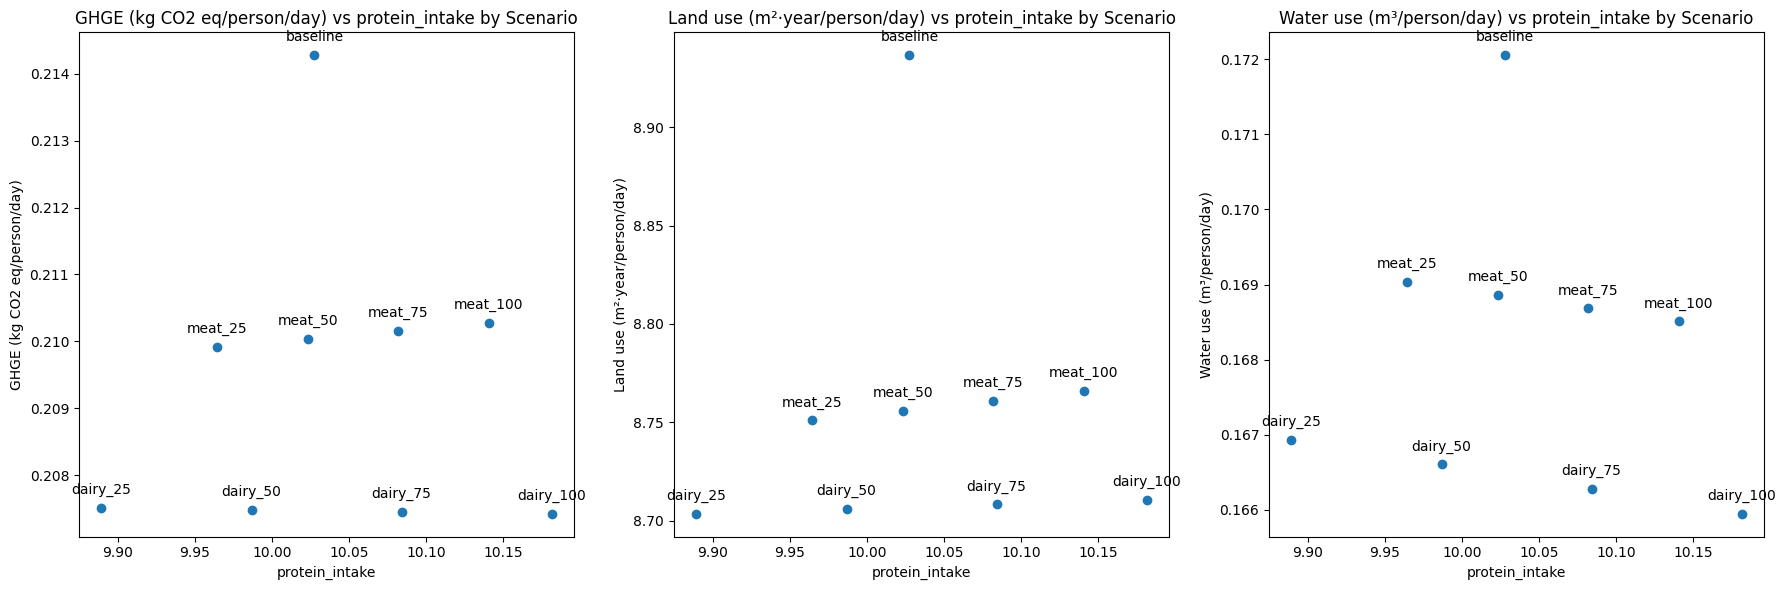

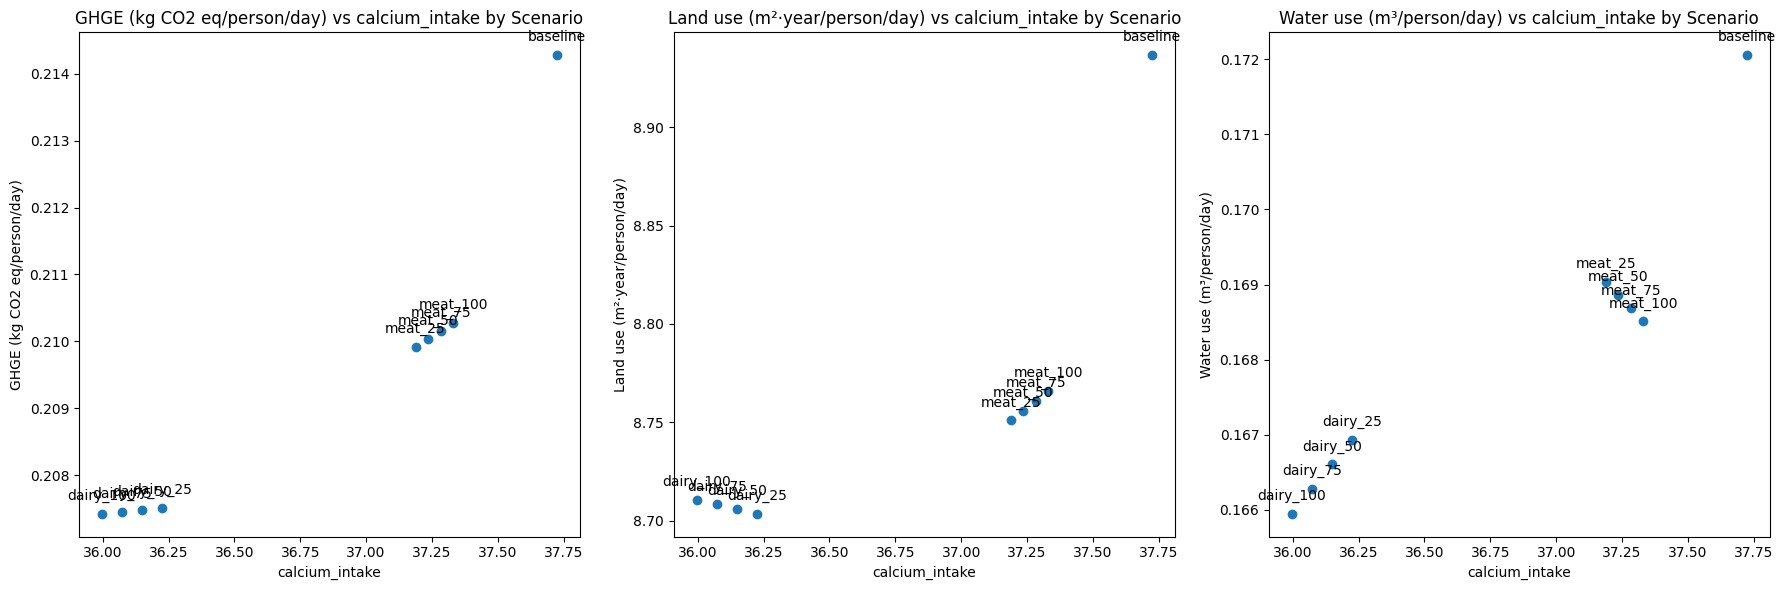

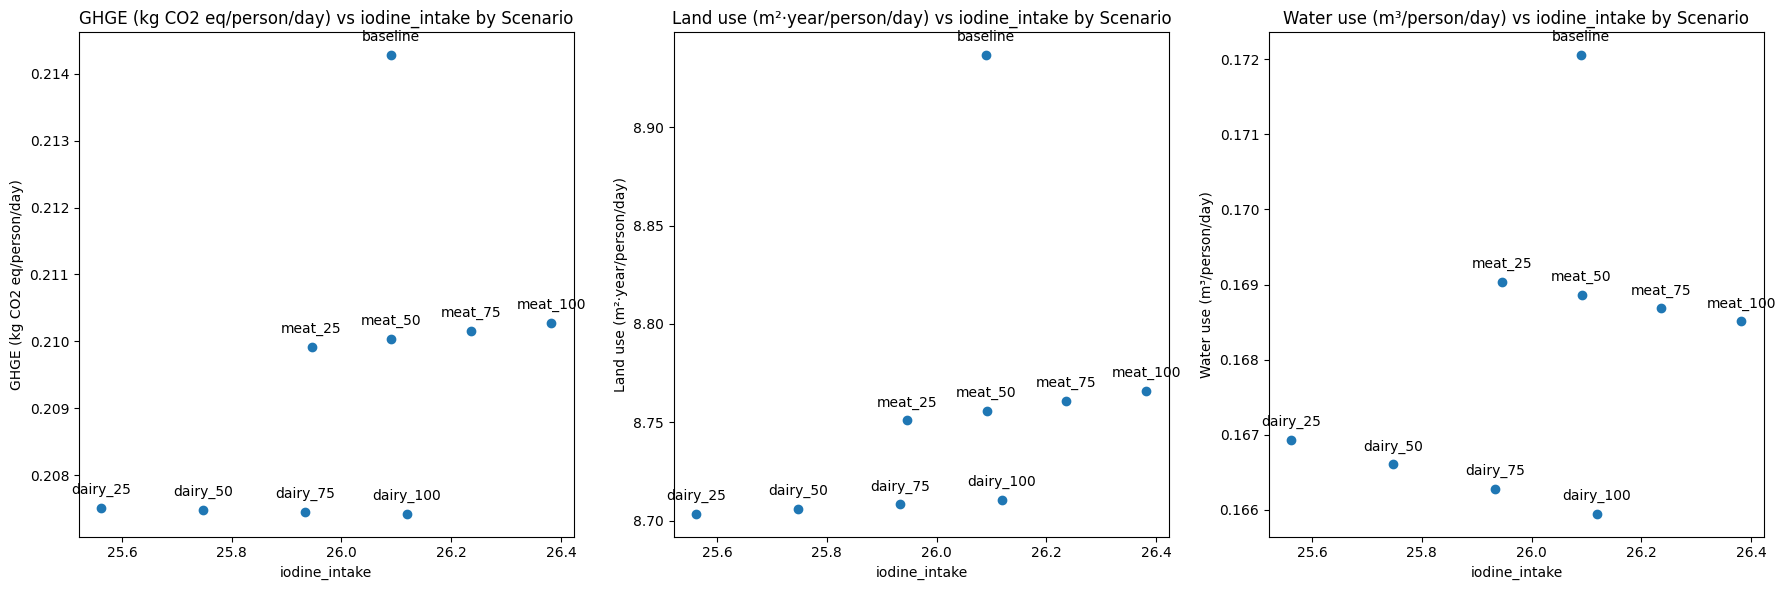

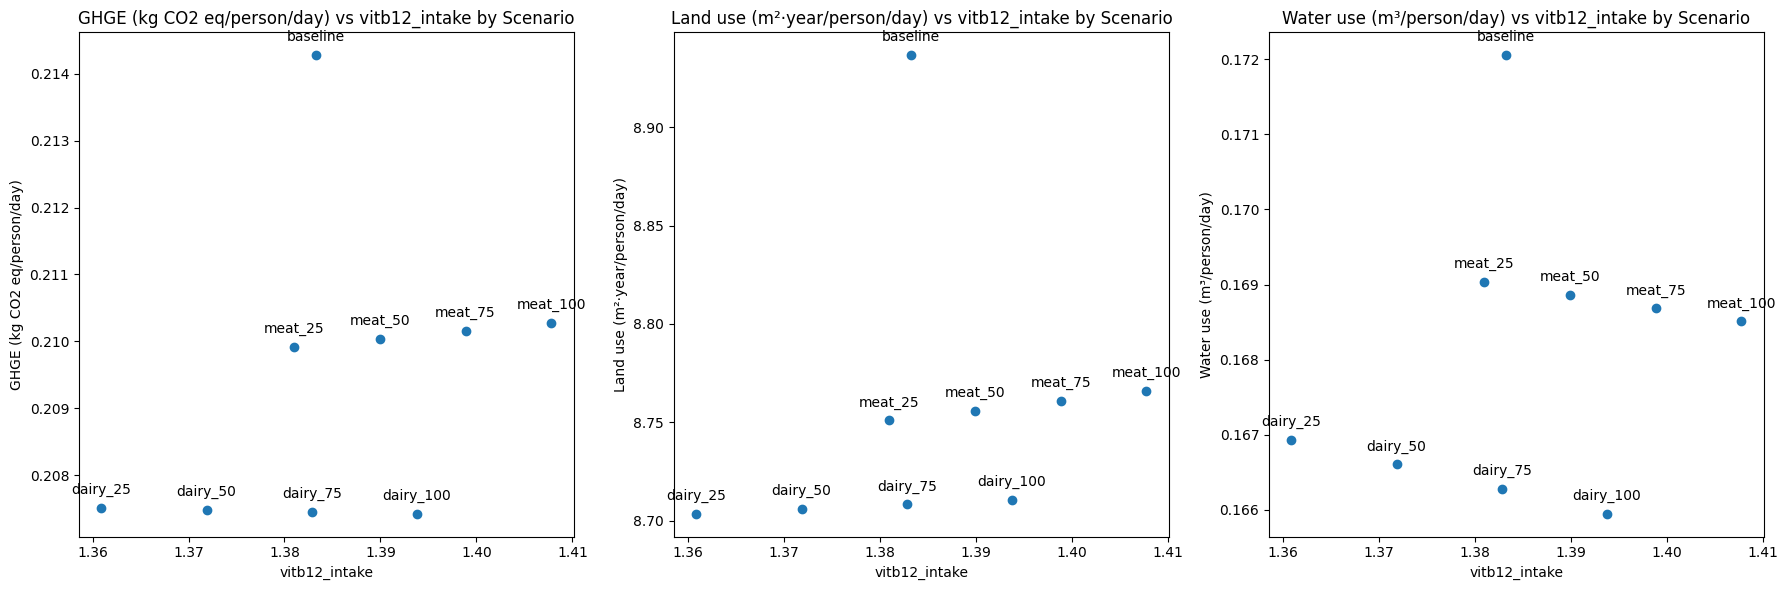

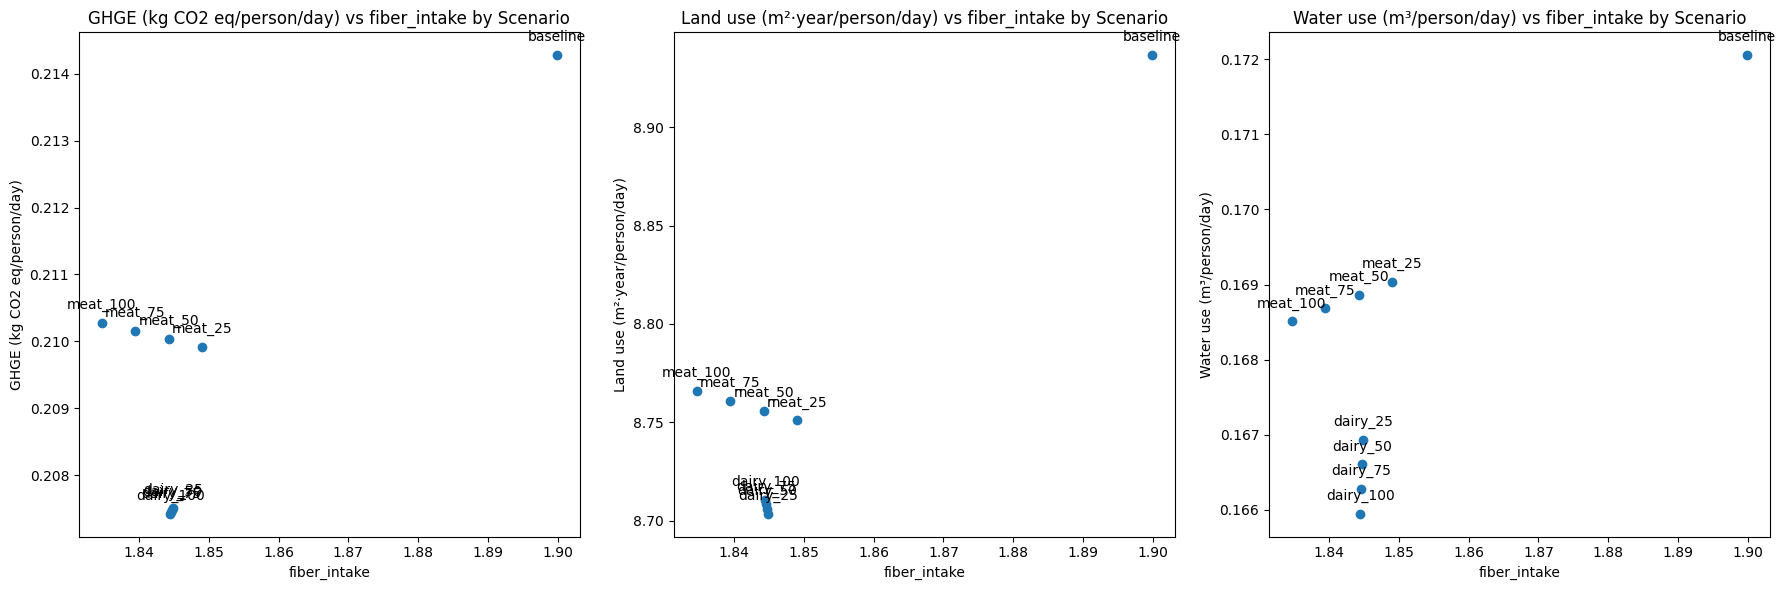

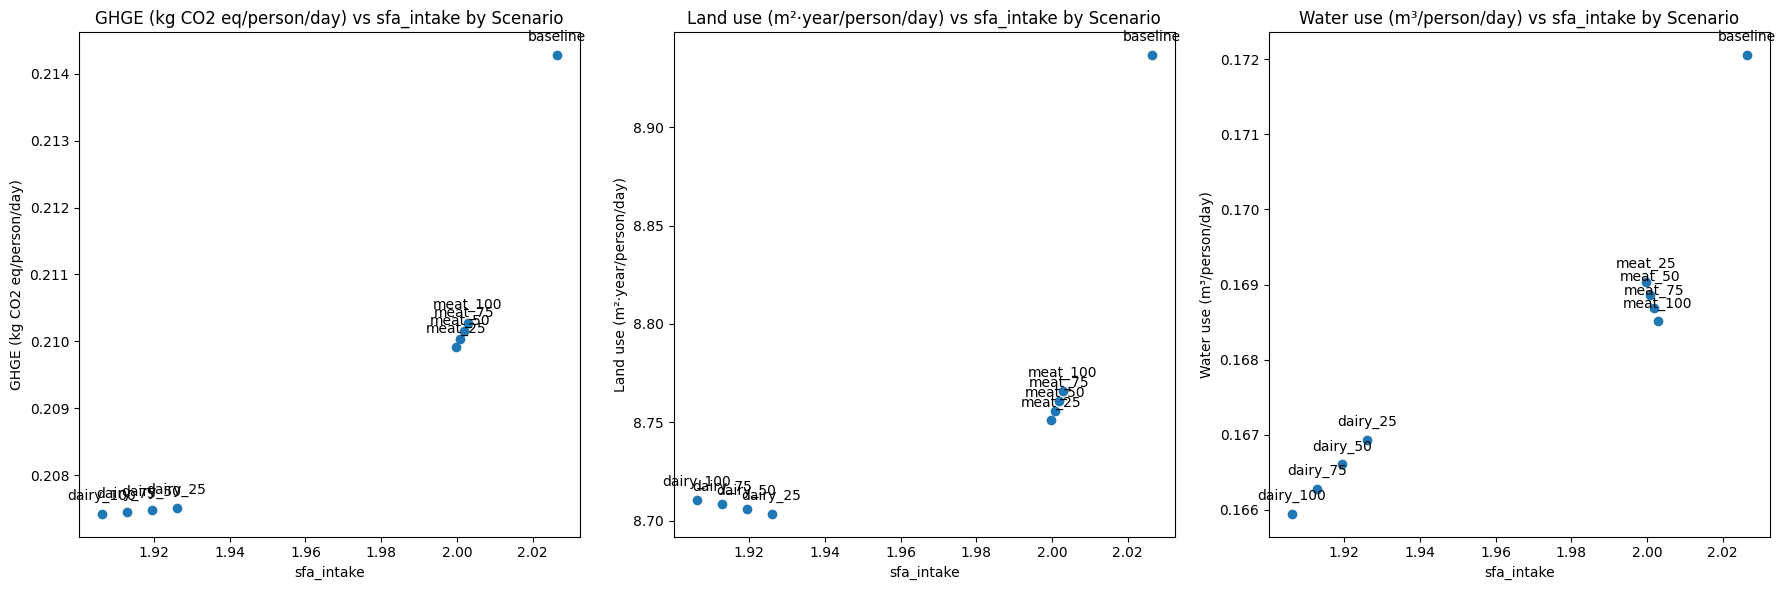

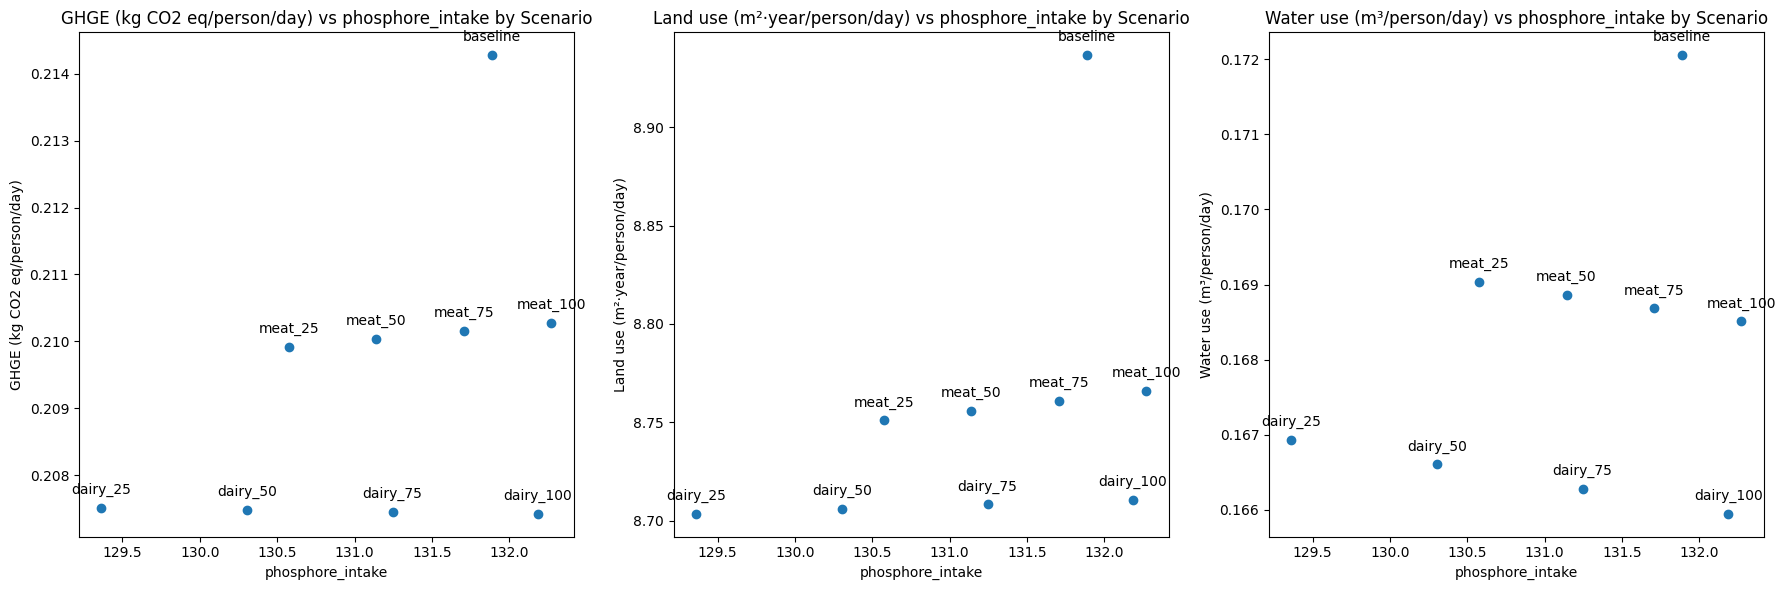

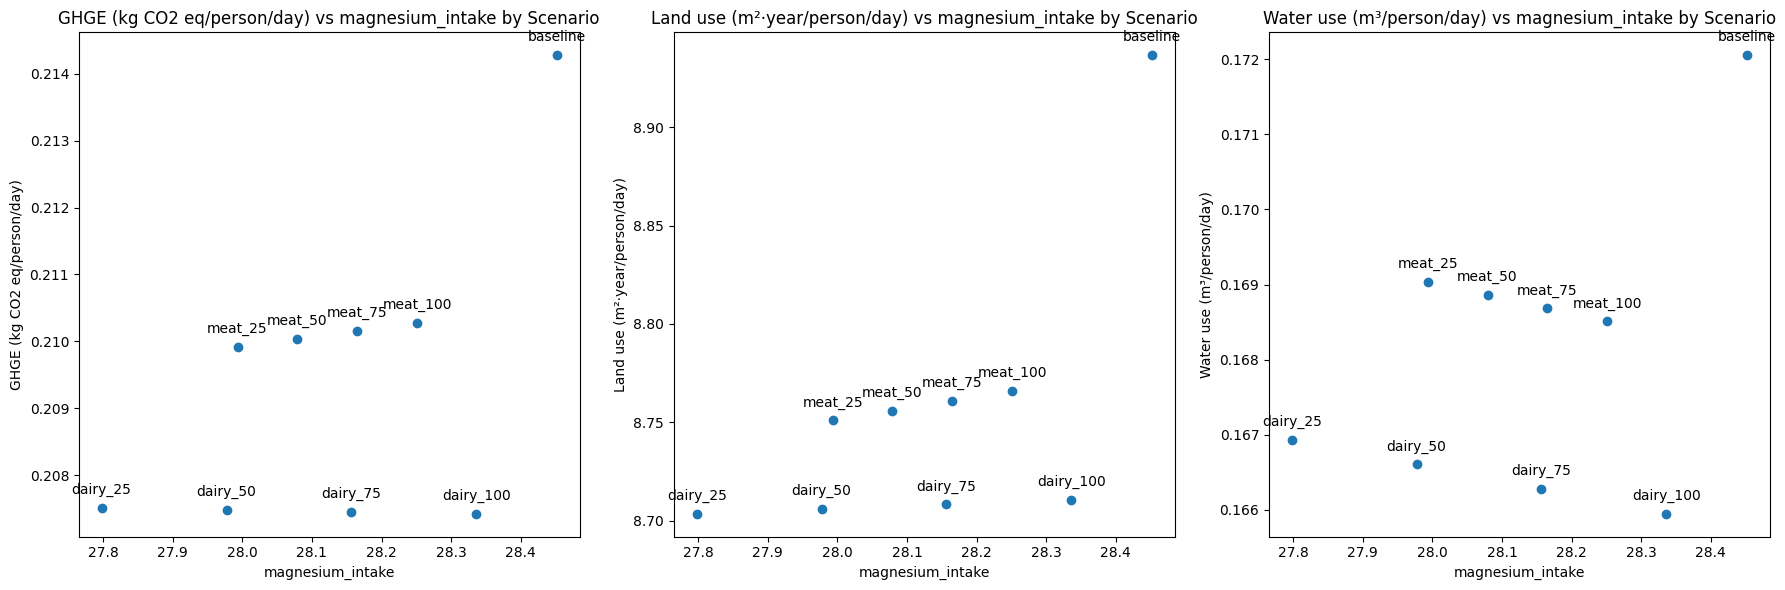

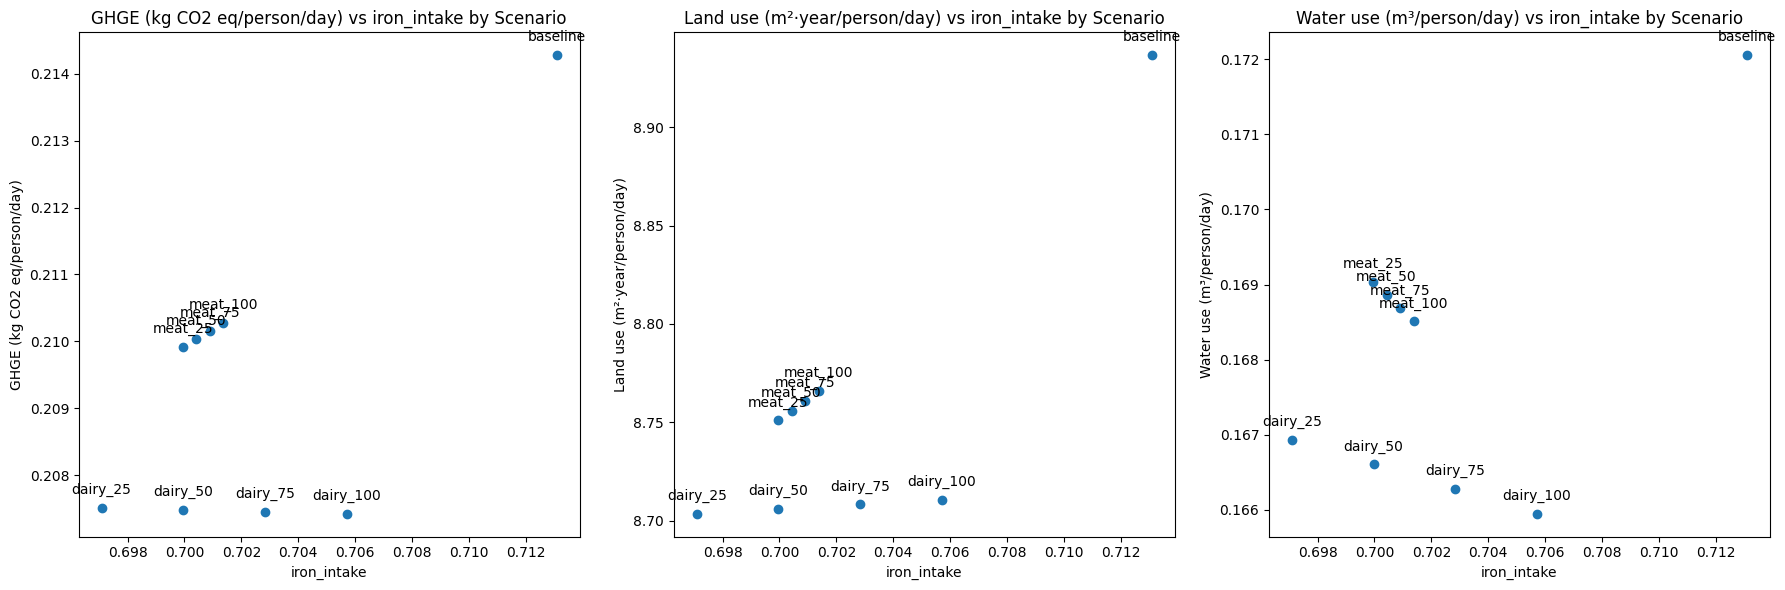

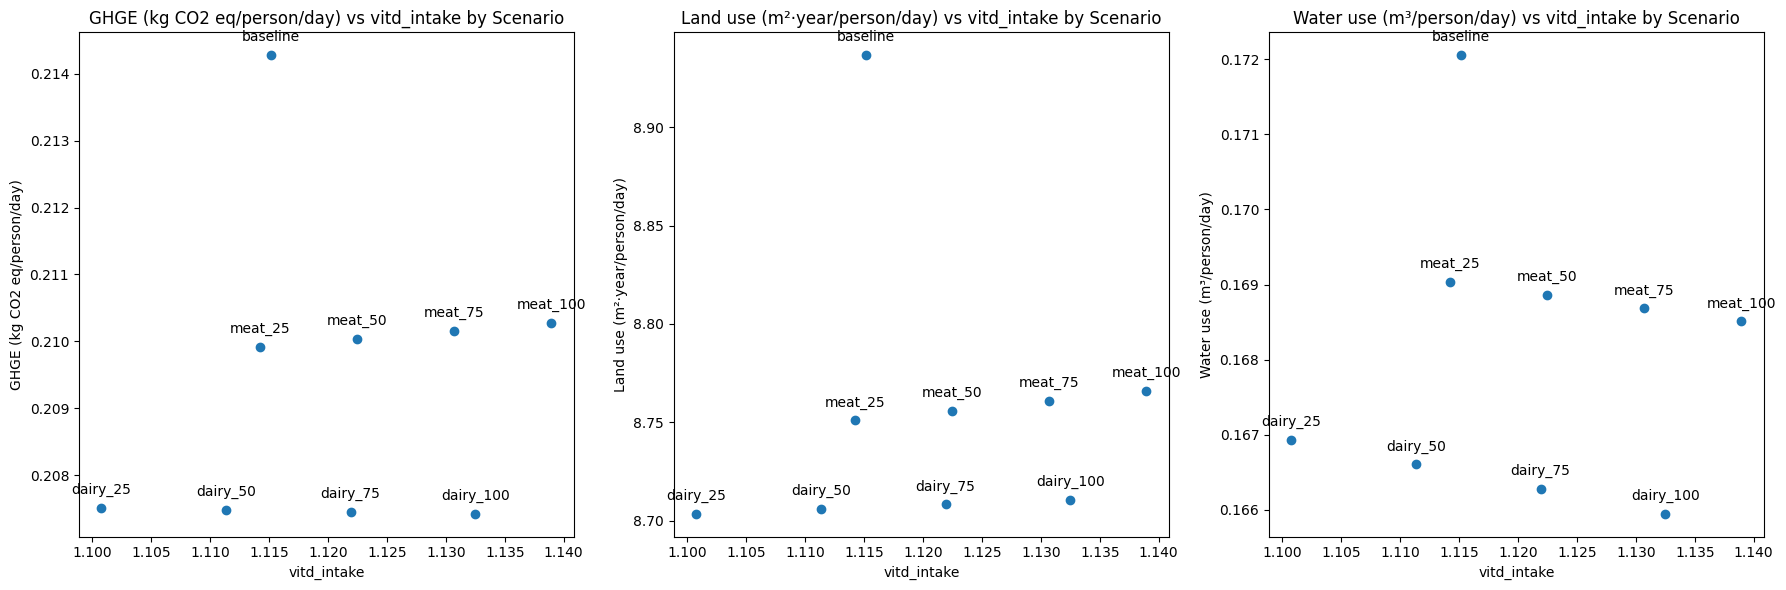

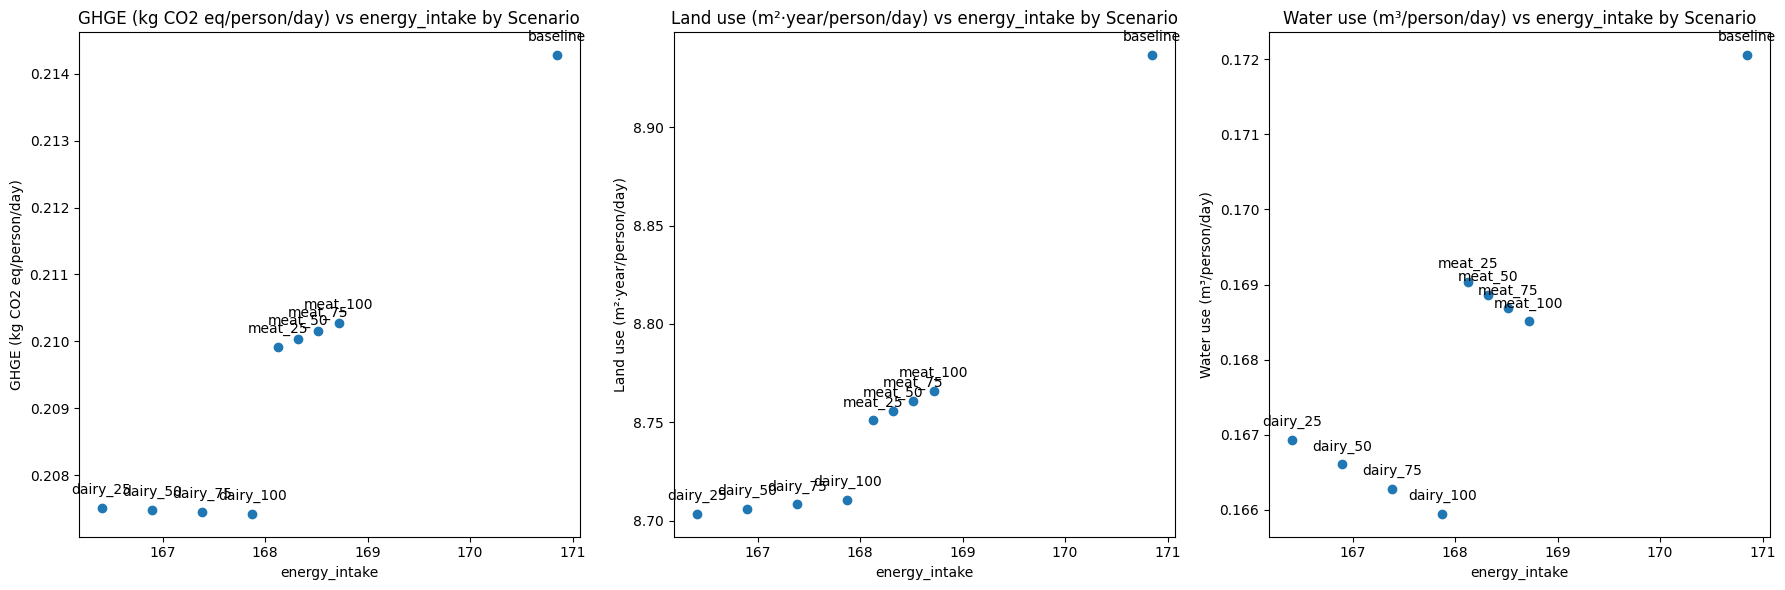

In [135]:
import matplotlib.pyplot as plt

# Select some representative nutrient intakes from pop_summary
nutrient_cols = ["protein_intake","calcium_intake", "iodine_intake","vitb12_intake", "fiber_intake", "sfa_intake", "phosphore_intake",
                                                            "magnesium_intake" ,"iron_intake","vitd_intake","energy_intake"]
environmental_cols = ["average_daily_ghge_kgco2", "average_daily_land_m2y", "average_daily_water_m3"]
environmental_labels = ["GHGE (kg CO2 eq/person/day)", "Land use (m²·year/person/day)", "Water use (m³/person/day)"]

for nutrient in nutrient_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # Create subplots for each environmental impact

    for i, env_col in enumerate(environmental_cols):
        axes[i].scatter(pop_summary[nutrient], pop_summary[env_col])
        axes[i].set_xlabel(nutrient)
        axes[i].set_ylabel(environmental_labels[i])
        axes[i].set_title(f'{environmental_labels[i]} vs {nutrient} by Scenario')

        # Annotate points with scenario names
        for j, scenario in enumerate(pop_summary.index):
            axes[i].annotate(scenario, (pop_summary[nutrient].iloc[j], pop_summary[env_col].iloc[j]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.tight_layout()
    plt.show()

In [128]:
summary = []
for scen, df_out in scenarios.items():
        # Use the output of simulate_substitution for other scenarios
        summary.append({
            "scenario": scen,
            "mean_GHGE": df_out["average_daily_ghge_kgco2"].mean(),
            "sd_GHGE": df_out["average_daily_ghge_kgco2"].var()**0.5,
            "median_GHGE": df_out["average_daily_ghge_kgco2"].median(),
            "total_GHGE": df_out["average_daily_ghge_kgco2"].sum(),
            "mean_land": df_out["average_daily_land_m2y"].mean(),
            "sd_land": df_out["average_daily_land_m2y"].var()**0.5,
            "median_land": df_out["average_daily_land_m2y"].median(),
            "total_land": df_out["average_daily_land_m2y"].sum(),
            "mean_water": df_out["average_daily_water_m3"].mean(),
            "sd_water": df_out["average_daily_water_m3"].var()**0.5,
            "median_water": df_out["average_daily_water_m3"].median(),
            "total_water": df_out["average_daily_water_m3"].sum()
        })

summary = pd.DataFrame(summary)

# Calculate reduction percentages
baseline_ghge_mean = summary.loc[summary["scenario"] == "baseline", "mean_GHGE"].values[0]
summary["reduction_%_GHGE"] = 100 * (baseline_ghge_mean - summary["mean_GHGE"]) / baseline_ghge_mean

baseline_land_mean = summary.loc[summary["scenario"] == "baseline", "mean_land"].values[0]
summary["reduction_%_land"] = 100 * (baseline_land_mean - summary["mean_land"]) / baseline_land_mean

baseline_water_mean = summary.loc[summary["scenario"] == "baseline", "mean_water"].values[0]
summary["reduction_%_water"] = 100 * (baseline_water_mean - summary["mean_water"]) / baseline_water_mean

print(summary)

    scenario  mean_GHGE   sd_GHGE  median_GHGE  total_GHGE  mean_land  \
0   baseline   0.214277  0.489634     0.134773  511.906936   8.936624   
1    meat_25   0.209912  0.467277     0.134773  501.480509   8.750992   
2    meat_50   0.210034  0.467189     0.134773  501.770505   8.755973   
3    meat_75   0.210155  0.467114     0.134773  502.060500   8.760955   
4   meat_100   0.210276  0.467053     0.134773  502.350496   8.765937   
5   dairy_25   0.207511  0.486725     0.132646  495.744797   8.703574   
6   dairy_50   0.207482  0.486680     0.131827  495.673984   8.705965   
7   dairy_75   0.207452  0.486671     0.131786  495.603170   8.708356   
8  dairy_100   0.207423  0.486699     0.131786  495.532357   8.710747   

     sd_land  median_land    total_land  mean_water  sd_water  median_water  \
0  31.792180     2.833822  21349.595361    0.172053  0.254939      0.093814   
1  30.346361     2.764286  20906.119112    0.169035  0.253827      0.092689   
2  30.341839     2.791406  20918

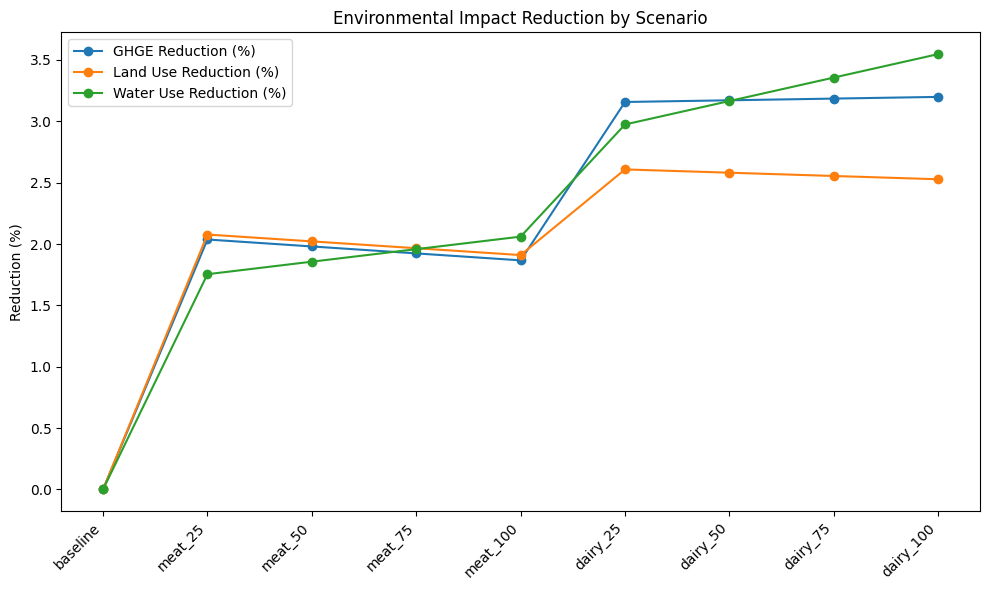

In [115]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# To plot reduction for each environmental factor, I need to reshape the data or plot each line separately
# Let's plot each line separately for clarity

ax.plot(summary["scenario"], summary["reduction_%_GHGE"], marker='o', label="GHGE Reduction (%)")
ax.plot(summary["scenario"], summary["reduction_%_land"], marker='o', label="Land Use Reduction (%)")
ax.plot(summary["scenario"], summary["reduction_%_water"], marker='o', label="Water Use Reduction (%)")


ax.set_ylabel('Reduction (%)')
ax.set_title('Environmental Impact Reduction by Scenario')
ax.set_xticks(range(len(summary["scenario"])))
ax.set_xticklabels(summary["scenario"], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

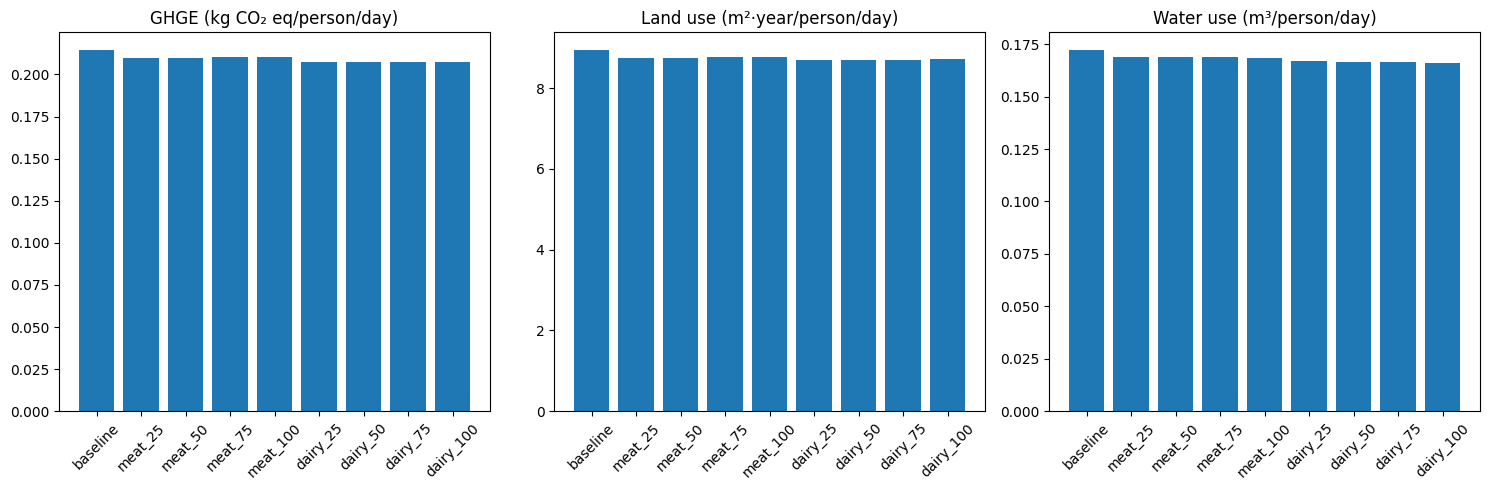

In [116]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].bar(summary["scenario"], summary["mean_GHGE"])
axes[0].set_title("GHGE (kg CO₂ eq/person/day)")
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(summary["scenario"], summary["mean_land"])
axes[1].set_title("Land use (m²·year/person/day)")
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(summary["scenario"], summary["mean_water"])
axes[2].set_title("Water use (m³/person/day)")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# @title Powered by Hasan MISAII